<a href="https://colab.research.google.com/github/jpantojaj/DIP-CS_AI/blob/main/Credit_Scoring_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desarrollo de un Modelo de Credit Scoring**

### **1. Carga Inicial de Librerías**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### **2. Entendimiento y Analisis Exploratorio de datos**

In [ ]:
df_clase = pd.read_csv('Base_SolicitudesCreditoEfectivo_201307_201505.csv', sep = ";")
df_clase.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,NaN,0,CLIENTES ORO,1,0,...,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,NaN,0,CLIENTES ORO,1,0,...,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,NaN,0,CLIENTES ORO,1,0,...,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,...,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,NaN,0,CLIENTES PLATINUM SEGM 2,1,0,...,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


In [ ]:
df_clase.shape

(31944, 31)

In [ ]:
df_clase.columns

Index(['CODMES', 'CODSOLICITUD', 'DEUDA', 'PLAZO_CREDITO', 'FLG_GARANTIA',
       'MIN_MES_DE_DEFAULT', 'FLG_DEFAULT_12M', 'SEGMENTOCLIENTE',
       'TARJETA_RELACIONADA', 'VEHICULAR_RELACIONADA',
       'HIPOTECARIO_RELACIONADA', 'ATRASO_MAXIMO_ULT_6M',
       'ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
       'MESES_AHORROS_ULT_6M', 'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA',
       'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'NUMERO_DE_PAGOS_PDH',
       'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'PROFESION',
       'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'EDAD_T', 'CUOTA', 'LINEA_DE_TC',
       'MONTO_TC_MEMBRESIA', 'FLG_TC_VISA', 'FLG_TC_MC'],
      dtype='object')

In [ ]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  int64  
 1   CODSOLICITUD             31944 non-null  int64  
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  int64  
 5   MIN_MES_DE_DEFAULT       3449 non-null   float64
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  int64  
 9   VEHICULAR_RELACIONADA    31944 non-null  int64  
 10  HIPOTECARIO_RELACIONADA  31944 non-null  int64  
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [ ]:
df_clase['CODMES']=df_clase['CODMES'].astype(str)
df_clase['CODSOLICITUD']=df_clase['CODSOLICITUD'].astype(str)
df_clase['MIN_MES_DE_DEFAULT']=df_clase['MIN_MES_DE_DEFAULT'].astype(str)
df_clase['FLG_GARANTIA']=df_clase['FLG_GARANTIA'].astype(str)
df_clase['TARJETA_RELACIONADA']=df_clase['TARJETA_RELACIONADA'].astype(str)
df_clase['VEHICULAR_RELACIONADA']=df_clase['VEHICULAR_RELACIONADA'].astype(str)
df_clase['HIPOTECARIO_RELACIONADA']=df_clase['HIPOTECARIO_RELACIONADA'].astype(str)
df_clase['CLASIF_SISTEMA_ULT_12M']=df_clase['CLASIF_SISTEMA_ULT_12M'].astype(str)
df_clase['FLG_PDH']=df_clase['FLG_PDH'].astype(str)
df_clase['FLG_TC_VISA']=df_clase['FLG_TC_VISA'].astype(str)
df_clase['FLG_TC_MC']=df_clase['FLG_TC_MC'].astype(str)

In [ ]:
df_clase.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,nan,0,CLIENTES ORO,1,0,...,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,nan,0,CLIENTES ORO,1,0,...,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,nan,0,CLIENTES ORO,1,0,...,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,...,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,nan,0,CLIENTES PLATINUM SEGM 2,1,0,...,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


In [ ]:
df_clase=df_clase.drop_duplicates()
df_clase.reset_index()
df_clase.shape

(31944, 31)

In [ ]:
df_clase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  object 
 1   CODSOLICITUD             31944 non-null  object 
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  object 
 5   MIN_MES_DE_DEFAULT       31944 non-null  object 
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  object 
 9   VEHICULAR_RELACIONADA    31944 non-null  object 
 10  HIPOTECARIO_RELACIONADA  31944 non-null  object 
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [ ]:
target_count = df_clase['FLG_DEFAULT_12M'].value_counts()
target_count

FLG_DEFAULT_12M
0    29920
1     2024
Name: count, dtype: int64

# Buen_Pagador: 29920
# 1 Mora_12M: 2024
Bad rate: 0.06336088154269973


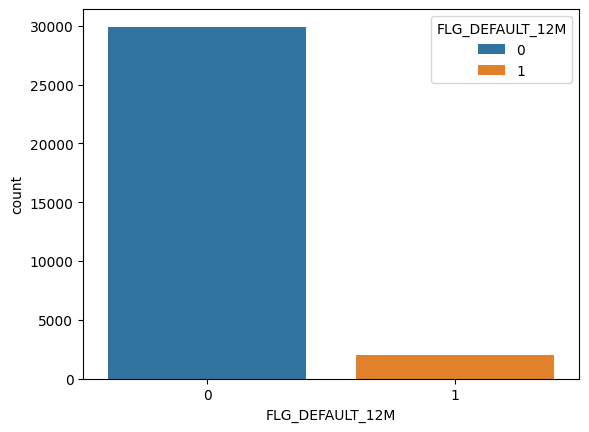

In [ ]:
sns.countplot(data = df_clase, x = "FLG_DEFAULT_12M", hue="FLG_DEFAULT_12M")
target_count = df_clase.FLG_DEFAULT_12M.value_counts()
print('# Buen_Pagador:', target_count[0])
print('# 1 Mora_12M:', target_count[1])
print('Bad rate:', target_count[1]/(target_count[0]+target_count[1]))

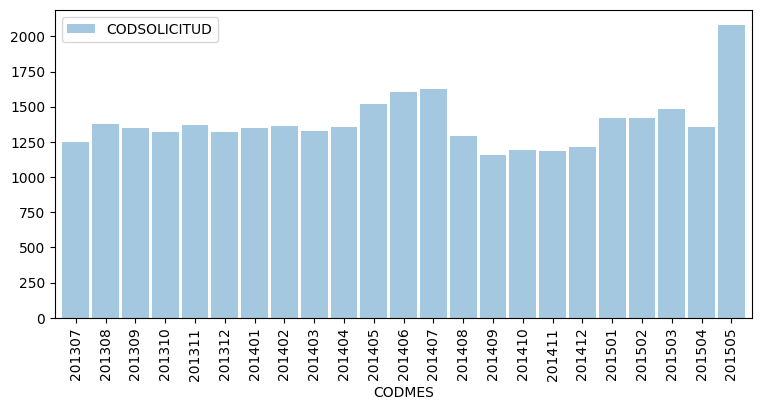

In [ ]:
a1=df_clase.pivot_table(values="CODSOLICITUD", index="CODMES", aggfunc="count", sort=True)
a1.plot(kind = 'bar',
       #stacked = 'True',          # Muestra las barras apiladas
       alpha = 0.4,               # nivel de transparencia
       width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
       figsize=(9,4));            # Cambiamos el tamaño de la figura

<Axes: xlabel='CODMES'>

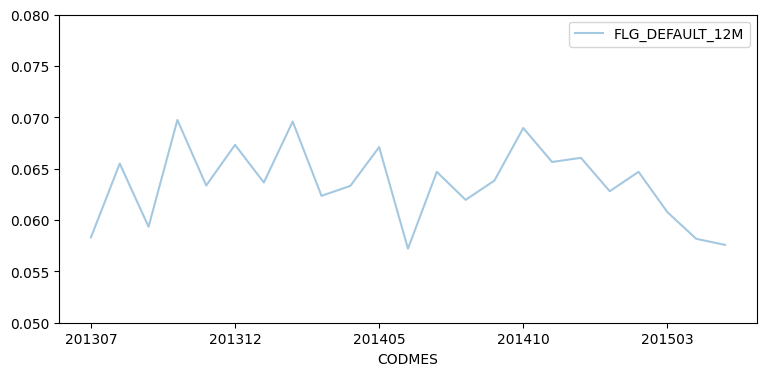

In [ ]:
a2=df_clase.pivot_table(values="FLG_DEFAULT_12M", index="CODMES", aggfunc="mean", sort=True)
a2.plot(alpha = 0.4, figsize=(9,4), ylim=(0.05,0.08))

### ***Hagamos el Análisis Univariado***

Revisemos la cantidad de nulos y sus proporciones por variable

In [ ]:
null_values = pd.concat([df_clase.isnull().sum(), df_clase.isnull().sum() / len(df_clase)], axis = 1)
null_values.rename(columns = {0: 'number_null_values',1: 'ratio_null_values'}, inplace = True)
null_values

,number_null_values,ratio_null_values
CODMES,0,0.000000
CODSOLICITUD,0,0.000000
DEUDA,0,0.000000
PLAZO_CREDITO,0,0.000000
FLG_GARANTIA,0,0.000000
MIN_MES_DE_DEFAULT,0,0.000000
FLG_DEFAULT_12M,0,0.000000
SEGMENTOCLIENTE,0,0.000000
TARJETA_RELACIONADA,0,0.000000
VEHICULAR_RELACIONADA,0,0.000000


Revisemos sus estadísticos básicos

In [ ]:
df_clase.select_dtypes(include=['number']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,31944.0,5769.284906,5848.504517,8.791365,1602.717111,3768.298333,7786.406583,2.054835e+05
PLAZO_CREDITO,31944.0,39.996588,15.623734,6.000000,24.000000,48.000000,48.000000,6.000000e+01
FLG_DEFAULT_12M,31944.0,0.063361,0.243615,0.000000,0.000000,0.000000,0.000000,1.000000e+00
ATRASO_MAXIMO_ULT_6M,31944.0,0.254070,3.028339,0.000000,0.000000,0.000000,0.000000,2.310000e+02
ATRASO_MAXIMO_ULT_12M,31941.0,1.074168,38.857057,0.000000,0.000000,0.000000,0.000000,5.647000e+03
ATRASO_MAXIMO_ULT_24M,31937.0,2.107931,47.275929,0.000000,0.000000,0.000000,0.000000,5.647000e+03
MESES_AHORROS_ULT_6M,31266.0,5.157935,1.449751,1.000000,5.000000,6.000000,6.000000,6.000000e+00
MEDIANA_AHORROS_ULT_6M,31942.0,7161.642671,8621.384272,0.000000,1703.222083,4325.187267,9396.200433,8.185772e+05
DEUDA_TOTAL_SISTEMA,28763.0,24409.216018,58799.081039,0.000000,1505.645000,6745.890000,20973.860000,1.458561e+06
NUMERO_DE_PAGOS_PDH,31944.0,16.291948,9.419303,0.000000,7.000000,24.000000,24.000000,2.400000e+01


In [ ]:
df_clase.select_dtypes(include=['object']).describe().transpose()

,count,unique,top,freq
CODMES,31944,23,201505,2084
CODSOLICITUD,31944,31944,1,1
FLG_GARANTIA,31944,2,0,30605
MIN_MES_DE_DEFAULT,31944,37,nan,28495
SEGMENTOCLIENTE,31944,7,CLIENTES ORO,22101
TARJETA_RELACIONADA,31944,2,1,19914
VEHICULAR_RELACIONADA,31944,2,0,31612
HIPOTECARIO_RELACIONADA,31944,2,0,31212
CLASIF_SISTEMA_ULT_12M,31944,6,0.0,23640
FLG_PDH,31944,2,1,26825


Revisemos como se distribuye cada variable

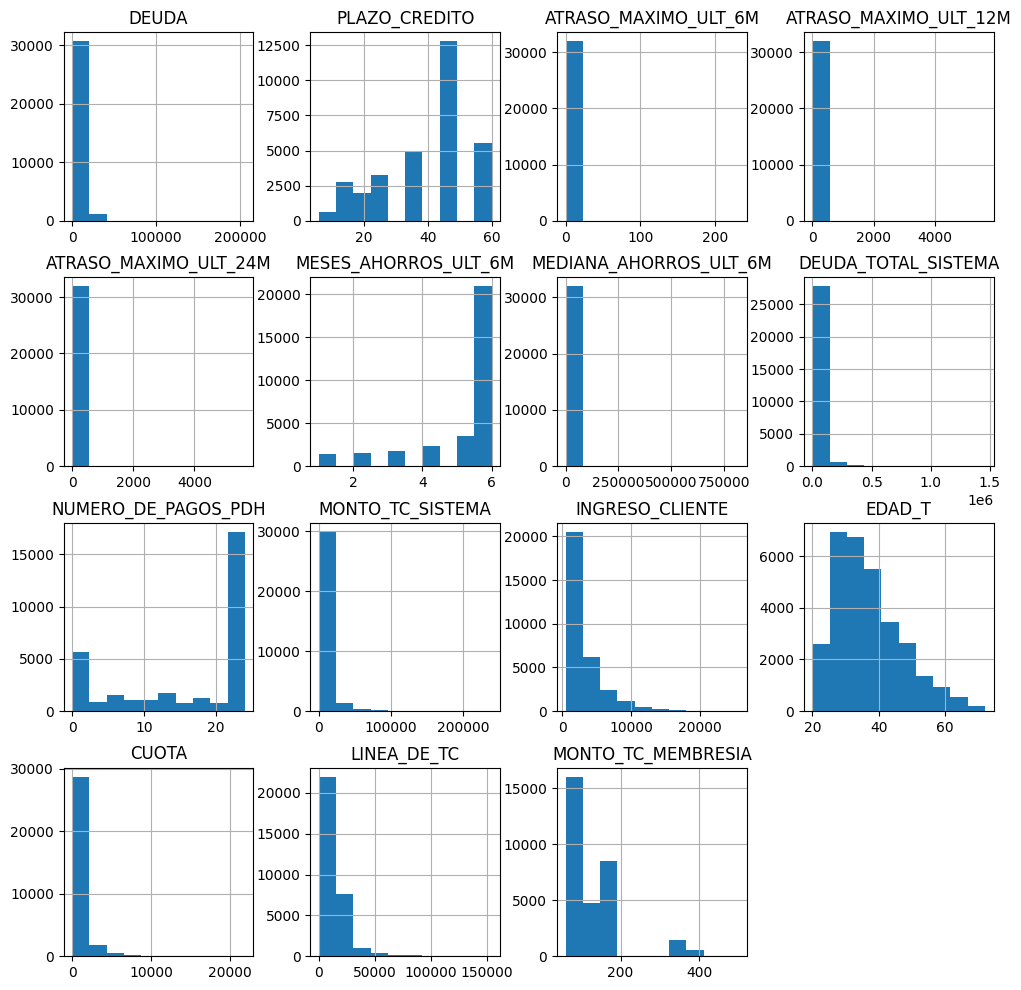

In [ ]:
df_clase.drop(columns = ['FLG_DEFAULT_12M']).hist(figsize = (12, 12))
plt.show()

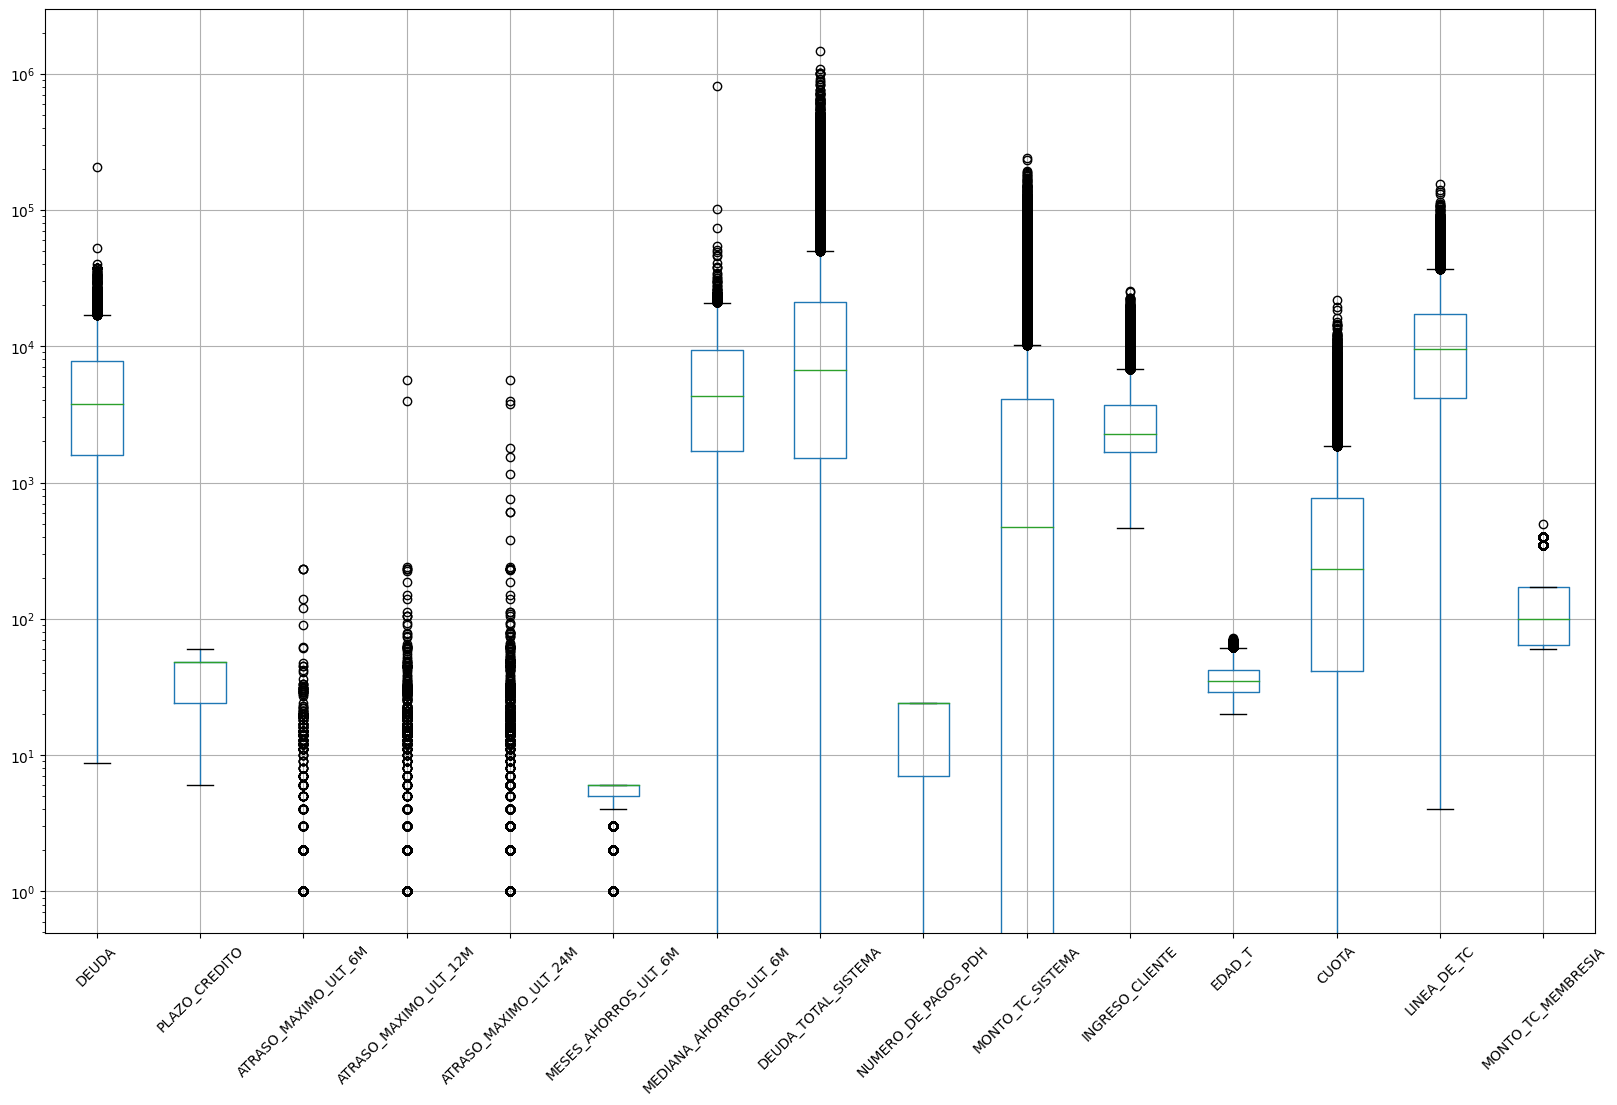

In [ ]:
df_clase.drop(columns = ['FLG_DEFAULT_12M']).boxplot(figsize = (20, 12))
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
def outliers_col(df):
  for columna in df:
    if df[columna].dtype != object:
      q1 = stats.scoreatpercentile(df[columna], 25)
      q3 = stats.scoreatpercentile(df[columna], 75)
      iqr = q3-q1
      lim_inf = q1-1.5*iqr
      lim_sup = q3+1.5*iqr
      n_outliers_inf = len(df[(df[columna]<lim_inf)])
      n_outliers_sup = len(df[(df[columna]>lim_sup)])
      print("{} | {} | {}".format(
          df[columna].name,
          n_outliers_inf,
          n_outliers_sup
          ))

In [ ]:
outliers_col(df_clase)

DEUDA | 0 | 2126
PLAZO_CREDITO | 0 | 0
FLG_DEFAULT_12M | 0 | 2024
ATRASO_MAXIMO_ULT_6M | 0 | 2005
ATRASO_MAXIMO_ULT_12M | 0 | 4154
ATRASO_MAXIMO_ULT_24M | 0 | 6634
MESES_AHORROS_ULT_6M | 4635 | 0
MEDIANA_AHORROS_ULT_6M | 0 | 3318
DEUDA_TOTAL_SISTEMA | 0 | 1880
NUMERO_DE_PAGOS_PDH | 0 | 0
MONTO_TC_SISTEMA | 0 | 4470
INGRESO_CLIENTE | 0 | 2512
EDAD_T | 0 | 350
CUOTA | 0 | 2867
LINEA_DE_TC | 0 | 1200
MONTO_TC_MEMBRESIA | 0 | 2015


# **3. Feature Engineering**

#### 3.1 Tratamiento de Missing:
####Según el caso elegiremos rellenar estos casos con un valor usualmente conocido (dado el tipo de variable que estemos analizando), o imputar con la mediana o el valor más frecuente, según sea numérica o categórica respectivamente

In [ ]:
# Para partir las bases
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
!pip install feature_engine

### Partición Train y test (considerando estratificación de la Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_clase.drop("FLG_DEFAULT_12M", axis=1),
    df_clase["FLG_DEFAULT_12M"],
    test_size=0.3,
    random_state=0,
    stratify=df_clase["FLG_DEFAULT_12M"] #este punto es importante para asegurar un adecuado muestreo de la variable objetivo
)

X_train.shape, X_test.shape

((22360, 30), (9584, 30))

In [ ]:
# Comprobación de la proporción de Y en train
y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])

0.06337209302325582

In [ ]:
# Comprobación de la proporción de Y en test
y_test.value_counts()[1]/(y_test.value_counts()[0]+y_test.value_counts()[1])

0.0633347245409015

In [ ]:
# Revisión de la proporción de nulos por variable
X_train.isnull().mean().where(X_train.isnull().mean()>0)

CODMES                          NaN
CODSOLICITUD                    NaN
DEUDA                           NaN
PLAZO_CREDITO                   NaN
FLG_GARANTIA                    NaN
MIN_MES_DE_DEFAULT              NaN
SEGMENTOCLIENTE                 NaN
TARJETA_RELACIONADA             NaN
VEHICULAR_RELACIONADA           NaN
HIPOTECARIO_RELACIONADA         NaN
ATRASO_MAXIMO_ULT_6M            NaN
ATRASO_MAXIMO_ULT_12M      0.000045
ATRASO_MAXIMO_ULT_24M      0.000179
MESES_AHORROS_ULT_6M       0.020081
MEDIANA_AHORROS_ULT_6M     0.000089
DEUDA_TOTAL_SISTEMA        0.100134
CLASIF_SISTEMA_ULT_12M          NaN
FLG_PDH                         NaN
NUMERO_DE_PAGOS_PDH             NaN
MONTO_TC_SISTEMA                NaN
INGRESO_CLIENTE            0.024240
PROFESION                  0.010286
ZONA_DEL_DESEMBOLSO        0.030367
ESTADO_CIVIL               0.030367
EDAD_T                     0.030367
CUOTA                      0.020081
LINEA_DE_TC                0.020081
MONTO_TC_MEMBRESIA         0

### Variable numéricas

In [ ]:
var_num = X_train.select_dtypes(include = ["number"])
var_num.isnull().mean().where(var_num.isnull().mean()>0)

DEUDA                          NaN
PLAZO_CREDITO                  NaN
ATRASO_MAXIMO_ULT_6M           NaN
ATRASO_MAXIMO_ULT_12M     0.000045
ATRASO_MAXIMO_ULT_24M     0.000179
MESES_AHORROS_ULT_6M      0.020081
MEDIANA_AHORROS_ULT_6M    0.000089
DEUDA_TOTAL_SISTEMA       0.100134
NUMERO_DE_PAGOS_PDH            NaN
MONTO_TC_SISTEMA               NaN
INGRESO_CLIENTE           0.024240
EDAD_T                    0.030367
CUOTA                     0.020081
LINEA_DE_TC               0.020081
MONTO_TC_MEMBRESIA        0.020081
dtype: float64

### Variables categóricas

In [ ]:
var_cat = X_train.select_dtypes(exclude = ["number"])
var_cat.isnull().mean().where(var_cat.isnull().mean()>0)

CODMES                          NaN
CODSOLICITUD                    NaN
FLG_GARANTIA                    NaN
MIN_MES_DE_DEFAULT              NaN
SEGMENTOCLIENTE                 NaN
TARJETA_RELACIONADA             NaN
VEHICULAR_RELACIONADA           NaN
HIPOTECARIO_RELACIONADA         NaN
CLASIF_SISTEMA_ULT_12M          NaN
FLG_PDH                         NaN
PROFESION                  0.010286
ZONA_DEL_DESEMBOLSO        0.030367
ESTADO_CIVIL               0.030367
FLG_TC_VISA                     NaN
FLG_TC_MC                       NaN
dtype: float64

### Generamos un pipeline para tratamiento de Nulos

In [ ]:
# Llamemos a la librería feature engine
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer

In [ ]:
# Construyamos alternativamente un nuevo pipeline con todos los métodos de imputación en uno solo
pipe_2 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE']),
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
    ]
)

In [ ]:
pipe_2.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['PROFESION',
                                               'ZONA_DEL_DESEMBOLSO',
                                               'ESTADO_CIVIL']))])

In [ ]:
pipe_2.named_steps["median_imputer"].imputer_dict_

{'LINEA_DE_TC': 9609.0, 'EDAD_T': 35.0, 'INGRESO_CLIENTE': 2271.1773555}

In [ ]:
pipe_2.named_steps["arbitrary_imputer"].imputer_dict_

{'CUOTA': 0,
 'DEUDA_TOTAL_SISTEMA': 0,
 'MEDIANA_AHORROS_ULT_6M': 0,
 'MESES_AHORROS_ULT_6M': 0,
 'ATRASO_MAXIMO_ULT_24M': 0,
 'ATRASO_MAXIMO_ULT_12M': 0,
 'MONTO_TC_MEMBRESIA': 0}

In [ ]:
pipe_2.named_steps['mode_imputer'].imputer_dict_

{'PROFESION': 'TECNICO',
 'ZONA_DEL_DESEMBOLSO': 'AREQUIPA',
 'ESTADO_CIVIL': 'SOL'}

In [ ]:
X_train_t = pipe_2.transform(X_train)
X_test_t = pipe_2.transform(X_test)

In [ ]:
X_train_t.isnull().mean()

CODMES                     0.0
CODSOLICITUD               0.0
DEUDA                      0.0
PLAZO_CREDITO              0.0
FLG_GARANTIA               0.0
MIN_MES_DE_DEFAULT         0.0
SEGMENTOCLIENTE            0.0
TARJETA_RELACIONADA        0.0
VEHICULAR_RELACIONADA      0.0
HIPOTECARIO_RELACIONADA    0.0
ATRASO_MAXIMO_ULT_6M       0.0
ATRASO_MAXIMO_ULT_12M      0.0
ATRASO_MAXIMO_ULT_24M      0.0
MESES_AHORROS_ULT_6M       0.0
MEDIANA_AHORROS_ULT_6M     0.0
DEUDA_TOTAL_SISTEMA        0.0
CLASIF_SISTEMA_ULT_12M     0.0
FLG_PDH                    0.0
NUMERO_DE_PAGOS_PDH        0.0
MONTO_TC_SISTEMA           0.0
INGRESO_CLIENTE            0.0
PROFESION                  0.0
ZONA_DEL_DESEMBOLSO        0.0
ESTADO_CIVIL               0.0
EDAD_T                     0.0
CUOTA                      0.0
LINEA_DE_TC                0.0
MONTO_TC_MEMBRESIA         0.0
FLG_TC_VISA                0.0
FLG_TC_MC                  0.0
dtype: float64

In [ ]:
X_test_t.isnull().mean()

CODMES                     0.0
CODSOLICITUD               0.0
DEUDA                      0.0
PLAZO_CREDITO              0.0
FLG_GARANTIA               0.0
MIN_MES_DE_DEFAULT         0.0
SEGMENTOCLIENTE            0.0
TARJETA_RELACIONADA        0.0
VEHICULAR_RELACIONADA      0.0
HIPOTECARIO_RELACIONADA    0.0
ATRASO_MAXIMO_ULT_6M       0.0
ATRASO_MAXIMO_ULT_12M      0.0
ATRASO_MAXIMO_ULT_24M      0.0
MESES_AHORROS_ULT_6M       0.0
MEDIANA_AHORROS_ULT_6M     0.0
DEUDA_TOTAL_SISTEMA        0.0
CLASIF_SISTEMA_ULT_12M     0.0
FLG_PDH                    0.0
NUMERO_DE_PAGOS_PDH        0.0
MONTO_TC_SISTEMA           0.0
INGRESO_CLIENTE            0.0
PROFESION                  0.0
ZONA_DEL_DESEMBOLSO        0.0
ESTADO_CIVIL               0.0
EDAD_T                     0.0
CUOTA                      0.0
LINEA_DE_TC                0.0
MONTO_TC_MEMBRESIA         0.0
FLG_TC_VISA                0.0
FLG_TC_MC                  0.0
dtype: float64

### 3.2 Tratamiento de Valores Raros o Poco frecuentes
En este punto, nos detenemos para revisar problemas de cardinalidad y si existen valores raros o poco frecuentes en nuestras variables categóricas

In [ ]:
cat_cols=['FLG_GARANTIA','SEGMENTOCLIENTE','TARJETA_RELACIONADA','VEHICULAR_RELACIONADA','HIPOTECARIO_RELACIONADA','CLASIF_SISTEMA_ULT_12M',
          'FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_TC_VISA','FLG_TC_MC']

In [ ]:
# Examinemos esto en la muestra de train
for col in cat_cols:
    print('variable: ', col, ' nro de categorias: ', X_train_t[col].nunique())

variable:  FLG_GARANTIA  nro de categorias:  2
variable:  SEGMENTOCLIENTE  nro de categorias:  7
variable:  TARJETA_RELACIONADA  nro de categorias:  2
variable:  VEHICULAR_RELACIONADA  nro de categorias:  2
variable:  HIPOTECARIO_RELACIONADA  nro de categorias:  2
variable:  CLASIF_SISTEMA_ULT_12M  nro de categorias:  6
variable:  FLG_PDH  nro de categorias:  2
variable:  PROFESION  nro de categorias:  170
variable:  ZONA_DEL_DESEMBOLSO  nro de categorias:  30
variable:  ESTADO_CIVIL  nro de categorias:  6
variable:  FLG_TC_VISA  nro de categorias:  3
variable:  FLG_TC_MC  nro de categorias:  3


In [ ]:
#Examinemos esto en la muestra de test
for col in cat_cols:
    print('variable: ', col, ' nro de categorias: ', X_test_t[col].nunique())

variable:  FLG_GARANTIA  nro de categorias:  2
variable:  SEGMENTOCLIENTE  nro de categorias:  5
variable:  TARJETA_RELACIONADA  nro de categorias:  2
variable:  VEHICULAR_RELACIONADA  nro de categorias:  2
variable:  HIPOTECARIO_RELACIONADA  nro de categorias:  2
variable:  CLASIF_SISTEMA_ULT_12M  nro de categorias:  6
variable:  FLG_PDH  nro de categorias:  2
variable:  PROFESION  nro de categorias:  138
variable:  ZONA_DEL_DESEMBOLSO  nro de categorias:  30
variable:  ESTADO_CIVIL  nro de categorias:  6
variable:  FLG_TC_VISA  nro de categorias:  3
variable:  FLG_TC_MC  nro de categorias:  3


In [ ]:
# Analicemos la variable Profesión
unique_to_train_set = [x for x in X_train_t.PROFESION.unique() if x not in X_test_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.PROFESION.unique() if x not in X_train_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 37
El nro de categorias que aparecen en el test y no en el train es 5


In [ ]:
# Analicemos la variable SEGMENTOCLIENTE
unique_to_train_set = [x for x in X_train_t.SEGMENTOCLIENTE.unique() if x not in X_test_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.SEGMENTOCLIENTE.unique() if x not in X_train_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 2
El nro de categorias que aparecen en el test y no en el train es 0


#### Generamos un pipeline para tratamiento de valores raros

In [ ]:
from feature_engine.encoding import RareLabelEncoder

In [ ]:
# Construyamos alternativamente un nuevo pipeline con todos los métodos de imputación y codificación de valores raros en uno solo
pipe_3 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE']),
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
        (
            "rare_encoder",
            RareLabelEncoder(tol=0.01,n_categories=5,variables=["PROFESION","SEGMENTOCLIENTE",])
        ),
    ]
)

In [ ]:
pipe_3.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['PROFESION',
                                               'ZONA_DEL_DESEMBOLSO',
                                               'ESTADO_CIVIL'])),
                ('rare_encoder',
                 RareLabelEncoder(n_categories=5, tol=0.01,
                                  variables=['PROFESION', 'SEGMENTOCLIENTE']))])

In [ ]:
X_train_t = pipe_3.transform(X_train)
X_test_t = pipe_3.transform(X_test)

In [ ]:
# Comprobando el funcionamiento del pipeline
# Analicemos la variable PROFESION
unique_to_train_set = [x for x in X_train_t.PROFESION.unique() if x not in X_test_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.PROFESION.unique() if x not in X_train_t.PROFESION.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [ ]:
# Analicemos la variable SEGMENTOCLIENTE
unique_to_train_set = [x for x in X_train_t.SEGMENTOCLIENTE.unique() if x not in X_test_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el train y no en el test es', len(unique_to_train_set))
unique_to_test_set = [x for x in X_test_t.SEGMENTOCLIENTE.unique() if x not in X_train_t.SEGMENTOCLIENTE.unique()]
print('El nro de categorias que aparecen en el test y no en el train es', len(unique_to_test_set))

El nro de categorias que aparecen en el train y no en el test es 0
El nro de categorias que aparecen en el test y no en el train es 0


In [ ]:
X_train_t.PROFESION.value_counts()

PROFESION
TECNICO                    7888
Rare                       4230
ADMINISTRADOR              3955
INGENIERO                  2202
CONTADOR                   1151
OBRERO / OPERADOR           583
ECONOMISTA                  393
ABOGADO                     376
MECANICO                    362
INGENIERO DE SISTEMAS       276
INGENIERO INDUSTRIAL        248
TEC MECANICO AUTOMOTRIZ     238
ENFERMERO                   229
TEC MECANICO INDUSTRIAL     229
Name: count, dtype: int64

In [ ]:
X_train_t.SEGMENTOCLIENTE.value_counts()

SEGMENTOCLIENTE
CLIENTES ORO                15423
CLIENTES PLATINUM SEGM 2     6646
Rare                          291
Name: count, dtype: int64

### IMPORTANTE: Hasta aqui tenemos un pipeline para imputar nuestras variables numéricas y categóricas en caso de missing, además de generar un grupo de casos "Raros" para las variables categóricas donde encontramos problemas.

### 3.3 Tratamiento de Outliers y Escalamiento

In [ ]:
X_train_t.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,22360.0,5800.149362,5912.375849,8.791365,1614.985000,3768.298333,7869.050000,2.054835e+05
PLAZO_CREDITO,22360.0,40.092084,15.547062,6.000000,24.000000,48.000000,48.000000,6.000000e+01
ATRASO_MAXIMO_ULT_6M,22360.0,0.274508,3.405186,0.000000,0.000000,0.000000,0.000000,2.310000e+02
ATRASO_MAXIMO_ULT_12M,22360.0,1.037478,38.114128,0.000000,0.000000,0.000000,0.000000,5.647000e+03
ATRASO_MAXIMO_ULT_24M,22360.0,2.151699,49.190130,0.000000,0.000000,0.000000,0.000000,5.647000e+03
MESES_AHORROS_ULT_6M,22360.0,5.055903,1.605819,0.000000,5.000000,6.000000,6.000000,6.000000e+00
MEDIANA_AHORROS_ULT_6M,22360.0,7189.387085,9092.414168,0.000000,1712.270417,4362.920626,9507.471667,8.185772e+05
DEUDA_TOTAL_SISTEMA,22360.0,22073.208282,56672.958615,0.000000,556.875000,5136.870000,18553.420000,1.079214e+06
NUMERO_DE_PAGOS_PDH,22360.0,16.261538,9.426468,0.000000,7.000000,24.000000,24.000000,2.400000e+01
MONTO_TC_SISTEMA,22360.0,5604.264393,14250.281961,0.000000,0.000000,478.565000,4188.745000,2.393316e+05


In [ ]:
outliers_col(X_train_t)

DEUDA | 0 | 1459
PLAZO_CREDITO | 0 | 0
ATRASO_MAXIMO_ULT_6M | 0 | 1409
ATRASO_MAXIMO_ULT_12M | 0 | 2903
ATRASO_MAXIMO_ULT_24M | 0 | 4614
MESES_AHORROS_ULT_6M | 3689 | 0
MEDIANA_AHORROS_ULT_6M | 0 | 2284
DEUDA_TOTAL_SISTEMA | 0 | 2567
NUMERO_DE_PAGOS_PDH | 0 | 0
MONTO_TC_SISTEMA | 0 | 3110
INGRESO_CLIENTE | 0 | 2229
EDAD_T | 0 | 512
CUOTA | 0 | 2288
LINEA_DE_TC | 0 | 917
MONTO_TC_MEMBRESIA | 0 | 1427


In [ ]:
num_cols=['DEUDA', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE','EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA']

In [ ]:
from feature_engine.outliers import Winsorizer
capper = Winsorizer(
    variables=num_cols,
    capping_method="quantiles",
    tail="right",
    fold=0.01,
)
capper.fit(X_train_t)

Winsorizer(capping_method='quantiles', fold=0.01,
           variables=['DEUDA', 'ATRASO_MAXIMO_ULT_6M', 'ATRASO_MAXIMO_ULT_12M',
                      'ATRASO_MAXIMO_ULT_24M', 'MEDIANA_AHORROS_ULT_6M',
                      'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA',
                      'INGRESO_CLIENTE', 'EDAD_T', 'CUOTA', 'LINEA_DE_TC',
                      'MONTO_TC_MEMBRESIA'])

In [ ]:
#capper.right_tail_caps_

In [ ]:
X_train_t = capper.transform(X_train_t)
X_test_t = capper.transform(X_test_t)

In [ ]:
#plot_boxplot_and_hist(X_train_t2, "var")
X_train_t.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,22360.0,5767.696927,5662.719977,8.791365,1614.985000,3768.298333,7869.050000,23574.760420
PLAZO_CREDITO,22360.0,40.092084,15.547062,6.000000,24.000000,48.000000,48.000000,60.000000
ATRASO_MAXIMO_ULT_6M,22360.0,0.130188,0.615047,0.000000,0.000000,0.000000,0.000000,5.000000
ATRASO_MAXIMO_ULT_12M,22360.0,0.592576,2.510538,0.000000,0.000000,0.000000,0.000000,16.000000
ATRASO_MAXIMO_ULT_24M,22360.0,1.270438,4.230890,0.000000,0.000000,0.000000,0.000000,25.000000
MESES_AHORROS_ULT_6M,22360.0,5.055903,1.605819,0.000000,5.000000,6.000000,6.000000,6.000000
MEDIANA_AHORROS_ULT_6M,22360.0,7146.544957,7272.373742,0.000000,1712.270417,4362.920626,9507.471667,24065.564330
DEUDA_TOTAL_SISTEMA,22360.0,20508.116018,43687.720951,0.000000,556.875000,5136.870000,18553.420000,280120.580200
NUMERO_DE_PAGOS_PDH,22360.0,16.261538,9.426468,0.000000,7.000000,24.000000,24.000000,24.000000
MONTO_TC_SISTEMA,22360.0,5286.382362,11951.112587,0.000000,0.000000,478.565000,4188.745000,72022.006800


### Ahora hagamos el escalado de variables de las variables numéricas

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler().set_output(transform="pandas")
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [ ]:
num_cols=['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA']

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().set_output(transform="pandas")
scaler.fit(X_train_t[num_cols])
X_train_t_numoutscal = scaler.transform(X_train_t[num_cols])
X_test_t_numoutscal = scaler.transform(X_test_t[num_cols])

In [ ]:
X_train_t_numoutscal.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,22360.0,0.319696,0.905446,-0.601130,-0.344306,0.000000e+00,0.655694,3.166974
PLAZO_CREDITO,22360.0,-0.329496,0.647794,-1.750000,-1.000000,0.000000e+00,0.000000,0.500000
ATRASO_MAXIMO_ULT_6M,22360.0,0.130188,0.615047,0.000000,0.000000,0.000000e+00,0.000000,5.000000
ATRASO_MAXIMO_ULT_12M,22360.0,0.592576,2.510538,0.000000,0.000000,0.000000e+00,0.000000,16.000000
ATRASO_MAXIMO_ULT_24M,22360.0,1.270438,4.230890,0.000000,0.000000,0.000000e+00,0.000000,25.000000
MESES_AHORROS_ULT_6M,22360.0,-0.944097,1.605819,-6.000000,-1.000000,0.000000e+00,0.000000,0.000000
MEDIANA_AHORROS_ULT_6M,22360.0,0.357095,0.932930,-0.559693,-0.340036,5.833685e-17,0.659964,2.527535
DEUDA_TOTAL_SISTEMA,22360.0,0.854122,2.427562,-0.285436,-0.254493,0.000000e+00,0.745507,15.279806
NUMERO_DE_PAGOS_PDH,22360.0,-0.455204,0.554498,-1.411765,-1.000000,0.000000e+00,0.000000,0.000000
MONTO_TC_SISTEMA,22360.0,1.147794,2.853149,-0.114250,-0.114250,0.000000e+00,0.885750,17.079923


In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
# Actualicemos nuestro pipeline
pipe_4 = Pipeline(
    [
        (
            "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE'])
        ),
        (
            "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
        (
            "rare_encoder",
            RareLabelEncoder(tol=0.01,n_categories=5,variables=["PROFESION","SEGMENTOCLIENTE",])
        ),
        (   "capper",
            Winsorizer(variables=['DEUDA', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE','EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'], capping_method="quantiles", tail="right", fold=0.01)
        ),
        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'])],remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")

        )
    ]
)

In [ ]:
pipe_4.fit(X_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 Cat...
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('e', RobustScaler(),
                                                  ['DEUDA', 'PLAZO_CREDITO',
                                                   'ATRASO_MAXIMO_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'NUMERO_DE_PAGOS_PDH',
                                                   'MONTO_TC_SISTEMA',
                                                   'INGRESO_CLIENTE', 'EDAD_T',
                                                   'CUOTA', 'LINEA_DE_TC',
                                                   'MONTO_TC_MEMBRESIA'])],
                                   verbose_feature_names_out=False))])

In [ ]:
X_train_t = pipe_4.transform(X_train)
X_test_t = pipe_4.transform(X_test)

In [ ]:
X_train_t.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEUDA,22360.0,0.319696,0.905446,-0.601130,-0.344306,0.000000e+00,0.655694,3.166974
PLAZO_CREDITO,22360.0,-0.329496,0.647794,-1.750000,-1.000000,0.000000e+00,0.000000,0.500000
ATRASO_MAXIMO_ULT_6M,22360.0,0.130188,0.615047,0.000000,0.000000,0.000000e+00,0.000000,5.000000
ATRASO_MAXIMO_ULT_12M,22360.0,0.592576,2.510538,0.000000,0.000000,0.000000e+00,0.000000,16.000000
ATRASO_MAXIMO_ULT_24M,22360.0,1.270438,4.230890,0.000000,0.000000,0.000000e+00,0.000000,25.000000
MESES_AHORROS_ULT_6M,22360.0,-0.944097,1.605819,-6.000000,-1.000000,0.000000e+00,0.000000,0.000000
MEDIANA_AHORROS_ULT_6M,22360.0,0.357095,0.932930,-0.559693,-0.340036,5.833685e-17,0.659964,2.527535
DEUDA_TOTAL_SISTEMA,22360.0,0.854122,2.427562,-0.285436,-0.254493,0.000000e+00,0.745507,15.279806
NUMERO_DE_PAGOS_PDH,22360.0,-0.455204,0.554498,-1.411765,-1.000000,0.000000e+00,0.000000,0.000000
MONTO_TC_SISTEMA,22360.0,1.147794,2.853149,-0.114250,-0.114250,0.000000e+00,0.885750,17.079923


## **4. Feature Selection**
Ahora, podemos determinar cuanto aportan estas variables? para esto calculemos su IV

In [ ]:
tot_train_t=pd.concat([X_train_t[cat_cols], y_train], axis=1)
tot_train_t.head()

,FLG_GARANTIA,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,CLASIF_SISTEMA_ULT_12M,FLG_PDH,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,FLG_TC_VISA,FLG_TC_MC,FLG_DEFAULT_12M
1517,0,CLIENTES PLATINUM SEGM 2,1,0,0,0.0,1,ADMINISTRADOR,CALLAO,SOL,0.0,0.0,0
27337,1,CLIENTES PLATINUM SEGM 2,0,0,1,0.0,0,CONTADOR,SAN_MARTIN,SOL,1.0,1.0,0
573,0,CLIENTES ORO,0,0,0,0.0,1,Rare,LIMA_NORTE,SEP,1.0,1.0,0
31740,0,CLIENTES ORO,0,0,0,0.0,1,TECNICO,AREQUIPA,CAS,1.0,1.0,0
25079,0,CLIENTES PLATINUM SEGM 2,1,0,1,1.0,1,INGENIERO,LIMA_ESTE,CAS,0.0,0.0,0


In [ ]:
def calculate_woe_iv(dataset, feature_cat, target):
    lst = []
    feature=feature_cat
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return iv, dset

In [ ]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('WOE')
    plt.title(str('WOE por ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

### Generemos un reporte con todas los IVs

In [ ]:
def getFeatureIV_Importance(df,features,target):
    featureIV_Importance=list()
    for v in features:
      iv, rep=calculate_woe_iv(df,v,target)
      featureIV_Importance.append(iv)
    display(pd.DataFrame({"Feature":features, "IV":featureIV_Importance}).sort_values("IV",ascending=False))

### 4.1 Variables Categóricas

In [ ]:
getFeatureIV_Importance(tot_train_t,cat_cols,"FLG_DEFAULT_12M")

,Feature,IV
5,CLASIF_SISTEMA_ULT_12M,0.139344
6,FLG_PDH,0.107184
7,PROFESION,0.095820
1,SEGMENTOCLIENTE,0.067551
8,ZONA_DEL_DESEMBOLSO,0.060199
9,ESTADO_CIVIL,0.055085
0,FLG_GARANTIA,0.042176
4,HIPOTECARIO_RELACIONADA,0.021914
10,FLG_TC_VISA,0.010919
11,FLG_TC_MC,0.009376


### En este punto, quedémonos solo con las variables cuyo IV es mayor al 2% y menor a 50%

In [ ]:
cat_cols_2=['SEGMENTOCLIENTE','CLASIF_SISTEMA_ULT_12M','FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_GARANTIA','HIPOTECARIO_RELACIONADA']

### 4.2 Variables numéricas

#### En este punto discretizo para luego encontrar el IV de las variables

In [ ]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [ ]:
disc1 = EqualFrequencyDiscretiser(q=10,
                                  variables=num_cols,
                                  return_boundaries=True,)
disc1.fit(X_train_t[num_cols])

EqualFrequencyDiscretiser(return_boundaries=True,
                          variables=['DEUDA', 'PLAZO_CREDITO',
                                     'ATRASO_MAXIMO_ULT_6M',
                                     'ATRASO_MAXIMO_ULT_12M',
                                     'ATRASO_MAXIMO_ULT_24M',
                                     'MESES_AHORROS_ULT_6M',
                                     'MEDIANA_AHORROS_ULT_6M',
                                     'DEUDA_TOTAL_SISTEMA',
                                     'NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA',
                                     'INGRESO_CLIENTE', 'EDAD_T', 'CUOTA',
                                     'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'])

In [ ]:
X_train_t_numdisc=disc1.transform(X_train_t[num_cols])
X_test_t_numdisc=disc1.transform(X_test_t[num_cols])

In [ ]:
X_train_t_numdisc.head()

,DEUDA,PLAZO_CREDITO,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA
1517,"(1.705, inf]","(0.0, inf]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(0.996, 2.205]","(-inf, -0.282]","(-0.471, inf]","(-inf, 0.0]","(2.201, inf]","(-0.154, 0.0]","(-0.283, -0.227]","(0.179, 0.43]","(0.545, 0.664]"
27337,"(-0.172, 0.0]","(-0.5, 0.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-inf, -4.0]","(0.218, 0.524]","(2.602, inf]","(-inf, -1.353]","(0.0, 0.216]","(0.481, 1.033]","(-0.692, -0.538]","(1.057, 2.284]","(0.43, 0.722]","(0.0, 0.282]"
573,"(0.0, 0.212]","(-0.5, 0.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(5.83e-17, 0.218]","(0.51, 1.076]","(-0.471, inf]","(-inf, 0.0]","(0.0, 0.173]","(0.385, 0.692]","(0.51, 1.057]","(-0.337, -0.169]","(-0.209, -0.155]"
31740,"(-0.473, -0.387]","(-0.5, 0.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(0.218, 0.524]","(0.51, 1.076]","(-0.471, inf]","(-inf, 0.0]","(0.173, 0.481]","(0.692, 1.231]","(0.51, 1.057]","(0.722, 1.113]","(-0.209, -0.155]"
25079,"(-0.286, -0.172]","(-1.5, -1.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(-0.162, 5.83e-17]","(2.602, inf]","(-0.471, inf]","(3.63, inf]","(2.201, inf]","(0.692, 1.231]","(2.284, inf]","(0.179, 0.43]","(0.664, inf]"


### Veamos cuales son las variables numéricas más importantes, basado en su IV

In [ ]:
tot_train_t2=pd.concat([X_train_t_numdisc, y_train], axis=1)
tot_train_t2.head()

,DEUDA,PLAZO_CREDITO,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_DEFAULT_12M
1517,"(1.705, inf]","(0.0, inf]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(0.996, 2.205]","(-inf, -0.282]","(-0.471, inf]","(-inf, 0.0]","(2.201, inf]","(-0.154, 0.0]","(-0.283, -0.227]","(0.179, 0.43]","(0.545, 0.664]",0
27337,"(-0.172, 0.0]","(-0.5, 0.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-inf, -4.0]","(0.218, 0.524]","(2.602, inf]","(-inf, -1.353]","(0.0, 0.216]","(0.481, 1.033]","(-0.692, -0.538]","(1.057, 2.284]","(0.43, 0.722]","(0.0, 0.282]",0
573,"(0.0, 0.212]","(-0.5, 0.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(5.83e-17, 0.218]","(0.51, 1.076]","(-0.471, inf]","(-inf, 0.0]","(0.0, 0.173]","(0.385, 0.692]","(0.51, 1.057]","(-0.337, -0.169]","(-0.209, -0.155]",0
31740,"(-0.473, -0.387]","(-0.5, 0.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(0.218, 0.524]","(0.51, 1.076]","(-0.471, inf]","(-inf, 0.0]","(0.173, 0.481]","(0.692, 1.231]","(0.51, 1.057]","(0.722, 1.113]","(-0.209, -0.155]",0
25079,"(-0.286, -0.172]","(-1.5, -1.0]","(-inf, inf]","(-inf, 1.0]","(-inf, 1.0]","(-1.0, inf]","(-0.162, 5.83e-17]","(2.602, inf]","(-0.471, inf]","(3.63, inf]","(2.201, inf]","(0.692, 1.231]","(2.284, inf]","(0.179, 0.43]","(0.664, inf]",0


In [ ]:
getFeatureIV_Importance(tot_train_t2,num_cols,"FLG_DEFAULT_12M")

,Feature,IV
6,MEDIANA_AHORROS_ULT_6M,0.358339
10,INGRESO_CLIENTE,0.337741
5,MESES_AHORROS_ULT_6M,0.201981
8,NUMERO_DE_PAGOS_PDH,0.183294
1,PLAZO_CREDITO,0.173877
13,LINEA_DE_TC,0.082388
11,EDAD_T,0.079741
14,MONTO_TC_MEMBRESIA,0.058139
0,DEUDA,0.046217
4,ATRASO_MAXIMO_ULT_24M,0.034082


### Nuevamente, en este punto también solo quedémonos con las variables numéricas con IV mayor a 2% y menor a 50%

In [ ]:
num_cols_2=['MEDIANA_AHORROS_ULT_6M','INGRESO_CLIENTE','MESES_AHORROS_ULT_6M','NUMERO_DE_PAGOS_PDH','PLAZO_CREDITO','LINEA_DE_TC','EDAD_T',
            'MONTO_TC_MEMBRESIA','DEUDA','ATRASO_MAXIMO_ULT_24M','DEUDA_TOTAL_SISTEMA','ATRASO_MAXIMO_ULT_12M']

### 4.3 Codificación de variables

#### Variables Categóricas

In [ ]:
from feature_engine.encoding import WoEEncoder

In [ ]:
encoder_2 = WoEEncoder(variables=cat_cols,
                       fill_value=0) #ignore_format=False
encoder_2.fit(X_train_t[cat_cols], y_train)

WoEEncoder(fill_value=0,
           variables=['FLG_GARANTIA', 'SEGMENTOCLIENTE', 'TARJETA_RELACIONADA',
                      'VEHICULAR_RELACIONADA', 'HIPOTECARIO_RELACIONADA',
                      'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'PROFESION',
                      'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'FLG_TC_VISA',
                      'FLG_TC_MC'])

In [ ]:
X_train_woe_enc = encoder_2.transform(X_train_t[cat_cols])
X_test_woe_enc = encoder_2.transform(X_test_t[cat_cols])

In [ ]:
X_train_woe_enc.head()

,FLG_GARANTIA,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,CLASIF_SISTEMA_ULT_12M,FLG_PDH,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,FLG_TC_VISA,FLG_TC_MC
1517,0.033388,-0.419546,0.069405,0.002526,0.017669,-0.229072,-0.171220,0.039208,0.238570,0.134467,0.078146,0.073294
27337,-1.267551,-0.419546,-0.126722,0.002526,-1.242477,-0.229072,0.631614,-0.441326,0.073878,0.134467,-0.128297,-0.114725
573,0.033388,0.151884,-0.126722,0.002526,0.017669,-0.229072,-0.171220,-0.273802,0.176343,-0.099129,-0.128297,-0.114725
31740,0.033388,0.151884,-0.126722,0.002526,0.017669,-0.229072,-0.171220,0.247396,-0.136696,-0.424542,-0.128297,-0.114725
25079,0.033388,-0.419546,0.069405,0.002526,-1.242477,0.344459,-0.171220,-0.497639,0.065255,-0.424542,0.078146,0.073294


### Actualizamos nuestro pipeline con todo el flujo de tratamiento de datos

In [ ]:
pipe_5 = Pipeline(
    [
        (   "median_imputer",
            MeanMedianImputer(imputation_method="median", variables=['LINEA_DE_TC','EDAD_T','INGRESO_CLIENTE'])
        ),
        (   "arbitrary_imputer",
            ArbitraryNumberImputer(arbitrary_number=0, variables=['CUOTA', 'DEUDA_TOTAL_SISTEMA', 'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'ATRASO_MAXIMO_ULT_24M','ATRASO_MAXIMO_ULT_12M','MONTO_TC_MEMBRESIA']),
        ),
        (   "mode_imputer",
           CategoricalImputer(imputation_method="frequent", variables=['PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL'])
        ),
        (   "rare_encoder",
            RareLabelEncoder(tol=0.01,n_categories=5,variables=["PROFESION","SEGMENTOCLIENTE",])
        ),
        (   "capper",
            Winsorizer(variables=['DEUDA', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE','EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'], capping_method="quantiles", tail="right", fold=0.01)
        ),
        (   "scaler",
            ColumnTransformer(transformers=[('e', RobustScaler(), ['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M','ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M','MESES_AHORROS_ULT_6M',
          'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA','NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T','CUOTA',
          'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'])],remainder='passthrough',verbose_feature_names_out=False).set_output(transform="pandas")
        ),
        (   "encoder_2",
            WoEEncoder(variables=['FLG_GARANTIA','SEGMENTOCLIENTE','TARJETA_RELACIONADA','VEHICULAR_RELACIONADA','HIPOTECARIO_RELACIONADA','CLASIF_SISTEMA_ULT_12M',
          'FLG_PDH','PROFESION','ZONA_DEL_DESEMBOLSO','ESTADO_CIVIL','FLG_TC_VISA','FLG_TC_MC'],
                       fill_value=0)
        ),
    ]
)

In [ ]:
pipe_5.fit(X_train,y_train)

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['LINEA_DE_TC', 'EDAD_T',
                                              'INGRESO_CLIENTE'])),
                ('arbitrary_imputer',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['CUOTA',
                                                   'DEUDA_TOTAL_SISTEMA',
                                                   'MEDIANA_AHORROS_ULT_6M',
                                                   'MESES_AHORROS_ULT_6M',
                                                   'ATRASO_MAXIMO_ULT_24M',
                                                   'ATRASO_MAXIMO_ULT_12M',
                                                   'MONTO_TC_MEMBRESIA'])),
                ('mode_imputer',
                 Cat...
                                                   'INGRESO_CLIENTE', 'EDAD_T',
                                                   'CUOTA', 'LINEA_DE_TC',
                                                   'MONTO_TC_MEMBRESIA'])],
                                   verbose_feature_names_out=False)),
                ('encoder_2',
                 WoEEncoder(fill_value=0,
                            variables=['FLG_GARANTIA', 'SEGMENTOCLIENTE',
                                       'TARJETA_RELACIONADA',
                                       'VEHICULAR_RELACIONADA',
                                       'HIPOTECARIO_RELACIONADA',
                                       'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH',
                                       'PROFESION', 'ZONA_DEL_DESEMBOLSO',
                                       'ESTADO_CIVIL', 'FLG_TC_VISA',
                                       'FLG_TC_MC']))])

In [ ]:
X_train_t_p = pipe_5.transform(X_train)
X_test_t_p = pipe_5.transform(X_test)

In [ ]:
X_train_t_p.head()

,DEUDA,PLAZO_CREDITO,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,...,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,CLASIF_SISTEMA_ULT_12M,FLG_PDH,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,FLG_TC_VISA,FLG_TC_MC
1517,2.197672,0.5,0.0,0.0,0.0,0.0,1.446314,-0.285436,0.000000,-0.114250,...,0.069405,0.002526,0.017669,-0.229072,-0.171220,0.039208,0.238570,0.134467,0.078146,0.073294
27337,-0.133657,0.0,0.0,0.0,0.0,-6.0,0.400565,6.247261,-1.352941,0.108265,...,-0.126722,0.002526,-1.242477,-0.229072,0.631614,-0.441326,0.073878,0.134467,-0.128297,-0.114725
573,0.163433,0.0,0.0,0.0,0.0,0.0,0.002082,0.765005,0.000000,-0.114250,...,-0.126722,0.002526,0.017669,-0.229072,-0.171220,-0.273802,0.176343,-0.099129,-0.128297,-0.114725
31740,-0.470631,0.0,0.0,0.0,0.0,0.0,0.451028,0.892976,0.000000,-0.114250,...,-0.126722,0.002526,0.017669,-0.229072,-0.171220,0.247396,-0.136696,-0.424542,-0.128297,-0.114725
25079,-0.176282,-1.0,0.0,0.0,0.0,0.0,-0.126619,12.930532,0.000000,3.809300,...,0.069405,0.002526,-1.242477,0.344459,-0.171220,-0.497639,0.065255,-0.424542,0.078146,0.073294


### 4.4 Análisis de Correlaciones
En este punto, verifiquemos si existe correlación en las variables predictoras que hemos elegido, con el fin de depurarlas

In [ ]:
# Creemos una función para identificar de manera masiva a las variables correlacionadas, en caso de tener un mayor volumen de variables
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [ ]:
X_train_t2=pd.concat([X_train_t_p[cat_cols_2], X_train_t_p[num_cols_2]], axis=1)
X_test_t2=pd.concat([X_test_t_p[cat_cols_2], X_test_t_p[num_cols_2]], axis=1)
X_train_t2.head()

,SEGMENTOCLIENTE,CLASIF_SISTEMA_ULT_12M,FLG_PDH,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,FLG_GARANTIA,HIPOTECARIO_RELACIONADA,MEDIANA_AHORROS_ULT_6M,INGRESO_CLIENTE,MESES_AHORROS_ULT_6M,NUMERO_DE_PAGOS_PDH,PLAZO_CREDITO,LINEA_DE_TC,EDAD_T,MONTO_TC_MEMBRESIA,DEUDA,ATRASO_MAXIMO_ULT_24M,DEUDA_TOTAL_SISTEMA,ATRASO_MAXIMO_ULT_12M
1517,-0.419546,-0.229072,-0.171220,0.039208,0.238570,0.134467,0.033388,0.017669,1.446314,2.868168,0.0,0.000000,0.5,0.233097,-0.076923,0.663636,2.197672,0.0,-0.285436,0.0
27337,-0.419546,-0.229072,0.631614,-0.441326,0.073878,0.134467,-1.267551,-1.242477,0.400565,1.000018,-6.0,-1.352941,0.0,0.465725,-0.538462,0.027273,-0.133657,0.0,6.247261,0.0
573,0.151884,-0.229072,-0.171220,-0.273802,0.176343,-0.099129,0.033388,0.017669,0.002082,0.091014,0.0,0.000000,0.0,-0.265526,0.461538,-0.190909,0.163433,0.0,0.765005,0.0
31740,0.151884,-0.229072,-0.171220,0.247396,-0.136696,-0.424542,0.033388,0.017669,0.451028,0.264821,0.0,0.000000,0.0,0.867921,0.769231,-0.172727,-0.470631,0.0,0.892976,0.0
25079,-0.419546,0.344459,-0.171220,-0.497639,0.065255,-0.424542,0.033388,-1.242477,-0.126619,5.639764,0.0,0.000000,-1.0,0.343121,1.000000,2.754545,-0.176282,0.0,12.930532,0.0


In [ ]:
corr_features = correlation(X_train_t2, 0.5)
len(set(corr_features))

0.6135156595958196 HIPOTECARIO_RELACIONADA FLG_GARANTIA
0.5758212989277812 INGRESO_CLIENTE SEGMENTOCLIENTE
0.6363092170734017 INGRESO_CLIENTE MEDIANA_AHORROS_ULT_6M
0.7235566123750897 NUMERO_DE_PAGOS_PDH FLG_PDH
0.5436368374368802 LINEA_DE_TC INGRESO_CLIENTE
0.5201603957306808 MONTO_TC_MEMBRESIA INGRESO_CLIENTE
0.6052085415511348 MONTO_TC_MEMBRESIA LINEA_DE_TC
0.577312241510113 DEUDA PLAZO_CREDITO
0.5276972142002392 DEUDA_TOTAL_SISTEMA HIPOTECARIO_RELACIONADA
0.5924502298651697 DEUDA_TOTAL_SISTEMA INGRESO_CLIENTE
0.6645233658004901 ATRASO_MAXIMO_ULT_12M ATRASO_MAXIMO_ULT_24M


9

In [ ]:
from feature_engine.selection import DropCorrelatedFeatures
sel = DropCorrelatedFeatures(
    threshold=0.5,
    method='pearson',
    missing_values='ignore'
)
sel.fit(X_train_t2)

DropCorrelatedFeatures(threshold=0.5)

In [ ]:
X_train_t2_p = sel.transform(X_train_t2)
X_test_t2_p = sel.transform(X_test_t2)

In [ ]:
X_train_t2_p.shape, X_test_t2_p.shape

((22360, 14), (9584, 14))

In [ ]:
X_train_t2_p.columns

Index(['SEGMENTOCLIENTE', 'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'PROFESION',
       'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'FLG_GARANTIA',
       'MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'LINEA_DE_TC',
       'EDAD_T', 'DEUDA', 'DEUDA_TOTAL_SISTEMA', 'ATRASO_MAXIMO_ULT_12M'],
      dtype='object')

In [ ]:
cat_cols_3=['SEGMENTOCLIENTE', 'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'PROFESION', 'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'FLG_GARANTIA']

In [ ]:
num_cols_3=['MEDIANA_AHORROS_ULT_6M', 'MESES_AHORROS_ULT_6M', 'LINEA_DE_TC', 'EDAD_T', 'DEUDA', 'DEUDA_TOTAL_SISTEMA', 'ATRASO_MAXIMO_ULT_12M']

### Alternativamente usaremos las variables numéricas discretizadas y codificadas

In [ ]:
X_train_t_numdisc.columns

Index(['DEUDA', 'PLAZO_CREDITO', 'ATRASO_MAXIMO_ULT_6M',
       'ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
       'MESES_AHORROS_ULT_6M', 'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA',
       'NUMERO_DE_PAGOS_PDH', 'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'EDAD_T',
       'CUOTA', 'LINEA_DE_TC', 'MONTO_TC_MEMBRESIA'],
      dtype='object')

In [ ]:
X_train_t_numdisc.shape

(22360, 15)

In [ ]:
encoder_4 = WoEEncoder(#variables=num_cols,
                       fill_value=0) #ignore_format=False
encoder_4.fit(X_train_t_numdisc, y_train)

WoEEncoder(fill_value=0)

In [ ]:
X_train_woe_enc2 = encoder_4.transform(X_train_t_numdisc)
X_test_woe_enc2 = encoder_4.transform(X_test_t_numdisc)

In [ ]:
X_train_woe_enc2.head()

,DEUDA,PLAZO_CREDITO,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA
1517,0.039254,-0.103855,0.0,-0.057462,-0.073017,-0.380749,-1.192188,-0.083611,-0.392951,-0.077143,-1.749389,0.115789,-0.087943,0.088857,-0.005886
27337,0.197495,0.373314,0.0,-0.057462,-0.073017,0.696012,-0.230653,-0.466773,0.622876,-0.028224,-0.525613,0.255996,0.096084,-0.211847,-0.108941
573,0.009753,0.373314,0.0,-0.057462,-0.073017,-0.380749,0.075099,0.031950,-0.392951,-0.077143,-0.354998,-0.209728,0.024599,0.078626,0.039955
31740,-0.331184,0.373314,0.0,-0.057462,-0.073017,-0.380749,-0.230653,0.031950,-0.392951,-0.077143,-0.258734,-0.243696,0.024599,-0.151363,0.039955
25079,0.052119,-0.602574,0.0,-0.057462,-0.073017,-0.380749,0.195691,-0.466773,-0.392951,-0.141847,-1.749389,-0.243696,-0.337293,0.088857,-0.852756


In [ ]:
X_train_t3_p=pd.concat([X_train_t2_p[cat_cols_3], X_train_woe_enc2[num_cols_3]], axis=1)
X_test_t3_p=pd.concat([X_test_t2_p[cat_cols_3], X_test_woe_enc2[num_cols_3]], axis=1)

## **5. Entrenamiento del Modelo**
En esta sección construiremos tres tipos de modelos y los evaluaremos para quedarnos con el mejor de ellos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
logit = LogisticRegression()
logit.fit(X_train_t2_p, y_train)
pred_train_logit = logit.predict_proba(X_train_t2_p)
pred_test_logit = logit.predict_proba(X_test_t2_p)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train_logit[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit[:,1])))

Train set
Logistic regression roc-auc: 0.7587740842157483
Test set
Logistic regression roc-auc: 0.7386640102961273


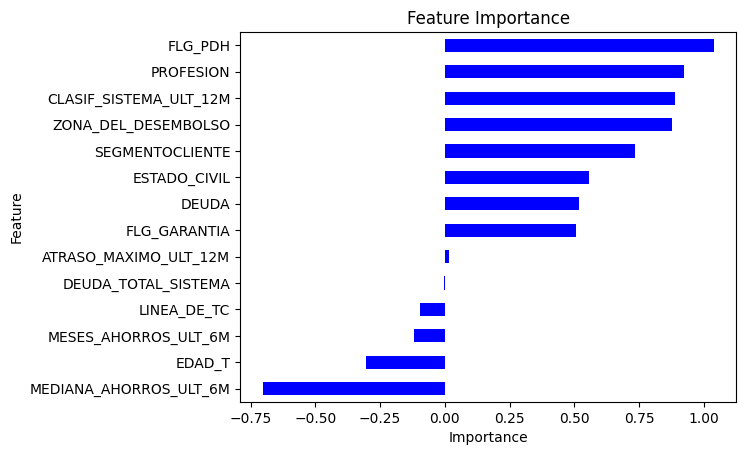

In [ ]:
fi=pd.Series(logit.coef_[0],index=logit.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

In [ ]:
logit_2 = LogisticRegression()
logit_2.fit(X_train_t3_p, y_train)
pred_train_logit_2 = logit_2.predict_proba(X_train_t3_p)
pred_test_logit_2 = logit_2.predict_proba(X_test_t3_p)
print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train_logit_2[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test_logit_2[:,1])))

Train set
Logistic regression roc-auc: 0.7575954304978958
Test set
Logistic regression roc-auc: 0.7355226306877231


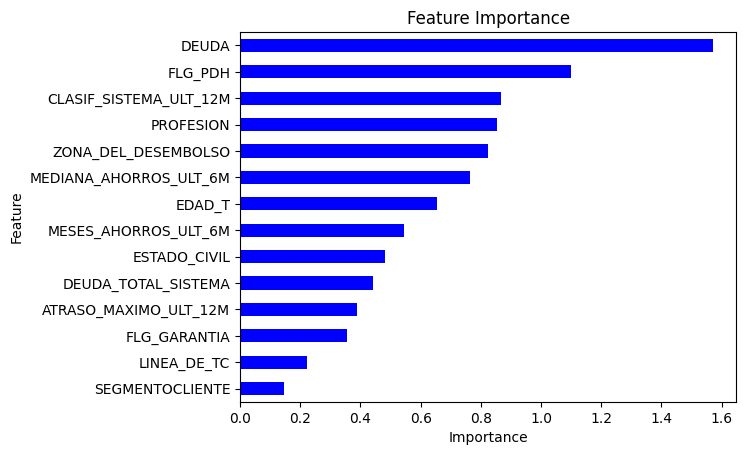

In [ ]:
fi=pd.Series(logit_2.coef_[0],index=logit_2.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

In [ ]:
rf = RandomForestClassifier(random_state=39)
rf.fit(X_train_t2_p, y_train)
pred_train_rf = rf.predict_proba(X_train_t2_p)
pred_test_rf = rf.predict_proba(X_test_t2_p)
print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train_rf[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test_rf[:,1])))

Train set
Random Forests roc-auc: 1.0
Test set
Random Forests roc-auc: 0.7289545918096749


In [ ]:
gbc = GradientBoostingClassifier(random_state=44)
gbc.fit(X_train_t2_p, y_train)
pred_train_gbc = gbc.predict_proba(X_train_t2_p)
pred_test_gbc = gbc.predict_proba(X_test_t2_p)
print('Train set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_train, pred_train_gbc[:,1])))
print('Test set')
print('Gradient Boosted Trees roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc[:,1])))

Train set
Gradient Boosted Trees roc-auc: 0.8160286425860481
Test set
Gradient Boosted Trees roc-auc: 0.747191201971577


#### IMPORTANTE: Hasta aqui tenemos un modelo ganador por estabilidad entre train y tes entonces revisemos como podemos optimizar sus hiperparámetros para reducir este efecto

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

## **Random Forest**

#### Evaluemos que la sensibilidad de cada hiperparámetro

#### Nro de árboles




In [ ]:
# random forests
rf = RandomForestClassifier(random_state=39)

# hyperparameter space
rf_param_grid = dict(
    n_estimators=[10, 20, 50, 100, 200],
#     max_depth=[1, 2, 3, 4, 5],
#     min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
)

# search
reg = GridSearchCV(rf, rf_param_grid,scoring='roc_auc', return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(X_train_t2_p, y_train)

# best hyperparameters
search.best_params_

{'n_estimators': 200}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params','mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'n_estimators': 10},0.999837,0.000017,0.655132,0.014530
1,{'n_estimators': 20},0.999995,0.000007,0.693347,0.013817
2,{'n_estimators': 50},1.000000,0.000000,0.718274,0.017262
3,{'n_estimators': 100},1.000000,0.000000,0.728506,0.016601
4,{'n_estimators': 200},1.000000,0.000000,0.736607,0.015667


Text(0.5, 0, 'n_estimators')

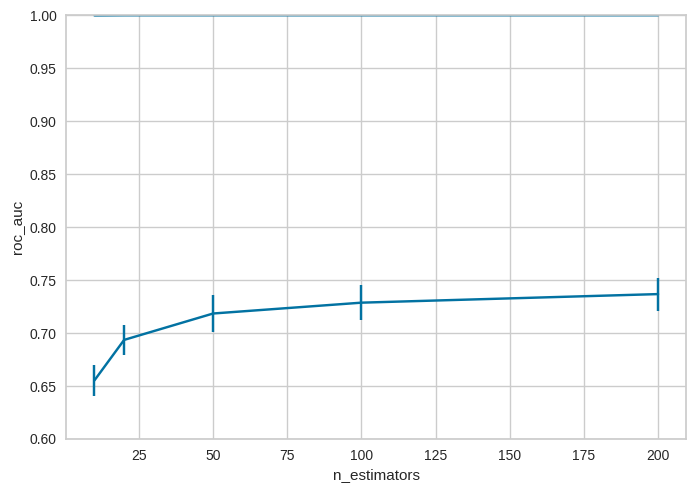

In [ ]:
# plot results
results.index = rf_param_grid['n_estimators']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('n_estimators')

#### Profundidad

In [ ]:
# random forests
rf = RandomForestClassifier(random_state=39)

# hyperparameter space
rf_param_grid = dict(
#     n_estimators=[10, 20, 50, 100, 200],
      max_depth=[1, 2, 3, 4, 5],
#     min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
)

# search
reg = GridSearchCV(rf, rf_param_grid,scoring='roc_auc', return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(X_train_t2_p, y_train)

# best hyperparameters
search.best_params_

{'max_depth': 5}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'max_depth': 1},0.716483,0.002729,0.708842,0.007692
1,{'max_depth': 2},0.737276,0.003175,0.723874,0.008694
2,{'max_depth': 3},0.754505,0.003399,0.735474,0.008466
3,{'max_depth': 4},0.776051,0.002054,0.745125,0.010294
4,{'max_depth': 5},0.799446,0.003463,0.750980,0.010242


Text(0.5, 0, 'max_depth')

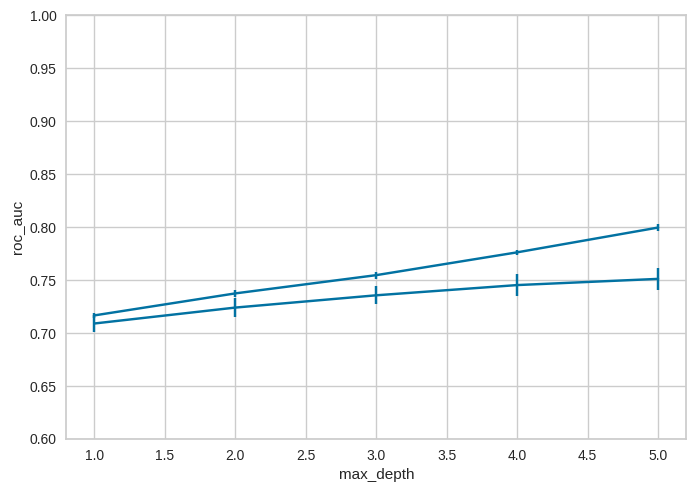

In [ ]:
# plot results
results.index = rf_param_grid['max_depth']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('max_depth')

#### Nro mínimo de observaciones para partir el nodo

In [ ]:
# random forests
rf = RandomForestClassifier(random_state=39)

# hyperparameter space
rf_param_grid = dict(
#     n_estimators=[10, 20, 50, 100, 200],
#     max_depth=[1, 2, 3, 4, 5],
      min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
)

# search
reg = GridSearchCV(rf, rf_param_grid,scoring='roc_auc', return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(X_train_t2_p, y_train)

# best hyperparameters
search.best_params_

{'min_samples_split': 0.01}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'min_samples_split': 0.01},0.902116,0.001665,0.759094,0.010512
1,{'min_samples_split': 0.05},0.802615,0.001819,0.754432,0.009858
2,{'min_samples_split': 0.1},0.775171,0.002000,0.746779,0.008460
3,{'min_samples_split': 0.2},0.750831,0.002641,0.735458,0.008876
4,{'min_samples_split': 0.3},0.736568,0.003313,0.724353,0.007995
5,{'min_samples_split': 0.5},0.718452,0.003799,0.709995,0.006699


Text(0.5, 0, 'min_samples_split')

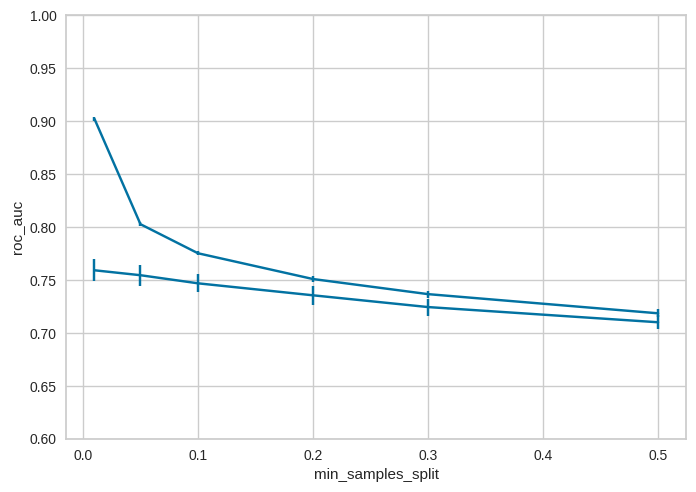

In [ ]:
# plot results
results.index = rf_param_grid['min_samples_split']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('min_samples_split')

## Veamos el GridSearch con todos los parámetros para evaluar la mejor combinación

In [ ]:
# random forests
rf = RandomForestClassifier(random_state=39)

# hyperparameter space
rf_param_grid = dict(
    n_estimators=[10, 20, 50, 100, 200],# 5 valores
    max_depth=[1, 2, 3, 4, 5],#5 valores
    min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5] #6 valores
)

# search
reg = GridSearchCV(rf, rf_param_grid,scoring='roc_auc',return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(X_train_t2_p, y_train)

# best hyperparameters
search.best_params_

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

In [ ]:
# Opciones de Cross Validation -> Esto se inserta en el hiperparámetro cv
# K-Fold Cross-Validation
#kf = KFold(n_splits=5, shuffle=True, random_state=4)
# Repeated K-Fold Cross-Validation
#rkf = RepeatedKFold(n_splits=5, n_repeats=10,random_state=4)
# Leave One Out Cross-Validation
#loo = LeaveOneOut()
# Leave P Out Cross-Validation
#lpo = LeavePOut(p=2)
# Stratified K Fold Cross-Validation
#skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

## Veamos el RandomSearch para encontrar la mejor combinación en el Random Forest

In [ ]:
# set up the model
rf = RandomForestClassifier(random_state=39)
# hyperparameter space
rf_param_grid = dict(
    n_estimators=stats.randint(10, 200),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )
# search
reg_rf = RandomizedSearchCV(rf, rf_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 60, random_state=10, n_jobs=4)
search_rf = reg_rf.fit(X_train_t2_p, y_train)

# best hyperparameters
search_rf.best_params_

{'max_depth': 4, 'min_samples_split': 0.07685550174624711, 'n_estimators': 155}

In [ ]:
results = pd.DataFrame(search_rf.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'max_depth': 4, 'min_samples_split': 0.076855...",0.763089,0.002782,0.742893,0.008287
1,"{'max_depth': 3, 'min_samples_split': 0.048628...",0.755184,0.002900,0.737759,0.007418
2,"{'max_depth': 3, 'min_samples_split': 0.000272...",0.754412,0.003306,0.735719,0.008213
3,"{'max_depth': 3, 'min_samples_split': 0.030616...",0.752950,0.003363,0.735088,0.007515
4,"{'max_depth': 3, 'min_samples_split': 0.038460...",0.752224,0.003116,0.734630,0.007725
5,"{'max_depth': 3, 'min_samples_split': 0.140575...",0.746935,0.002518,0.733543,0.008045
6,"{'max_depth': 2, 'min_samples_split': 0.131458...",0.738058,0.003577,0.726405,0.007680
7,"{'max_depth': 4, 'min_samples_split': 0.327144...",0.736690,0.002986,0.726039,0.009074
8,"{'max_depth': 4, 'min_samples_split': 0.335499...",0.734472,0.002438,0.723776,0.008796
9,"{'max_depth': 3, 'min_samples_split': 0.356250...",0.733383,0.003710,0.722798,0.008089


Text(0.5, 0, 'Hyperparameter space')

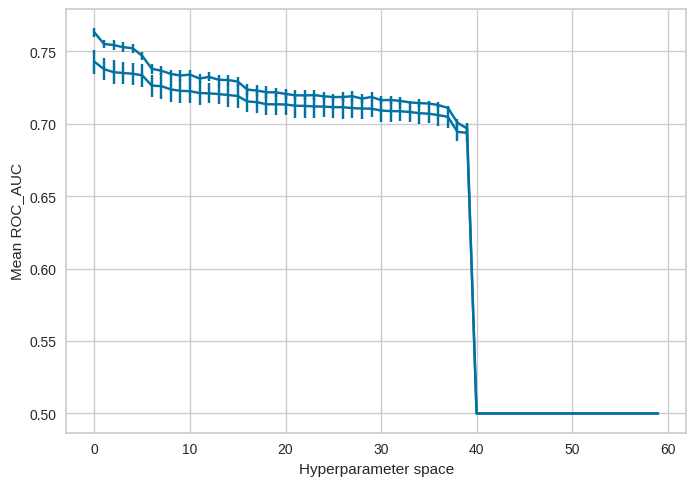

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
#plt.ylim(0.1, 1)
plt.xlabel('Hyperparameter space')

#### CONCLUSION RF: Evaluemos como le va al modelo con los hiperparametros elegidos en train y test

In [ ]:
# Lo dejamos entrenado con los parámetros hallados
rf = RandomForestClassifier(max_depth= 4, min_samples_split=0.07685550174624711, n_estimators=155, random_state=39)
rf.fit(X_train_t2_p, y_train)
pred_train_rf = rf.predict_proba(X_train_t2_p)
pred_test_rf = rf.predict_proba(X_test_t2_p)
print('Train roc_auc: ', roc_auc_score(y_train, pred_train_rf[:,1]))
print('Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]))

Train roc_auc:  0.7594900949517478
Test roc_auc:  0.7379170896005699


## **Gradient Boosting**


#### Evaluemos la sensibilidad de cada parámetro

#### Nro de Arboles

In [ ]:
# set up the model
gbc = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    n_estimators=[10, 20, 50, 100, 200],
    #min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #max_depth=[1,2,3,4,5],
    )

# search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(X_train_t2_p, y_train)

# best hyperparameters
search.best_params_

{'n_estimators': 100}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'n_estimators': 10},0.757764,0.003401,0.729320,0.012783
1,{'n_estimators': 20},0.777977,0.004046,0.745028,0.012196
2,{'n_estimators': 50},0.804495,0.002659,0.758283,0.010185
3,{'n_estimators': 100},0.825773,0.001816,0.761320,0.010962
4,{'n_estimators': 200},0.856772,0.003245,0.760314,0.011598


Text(0.5, 0, 'n_estimators')

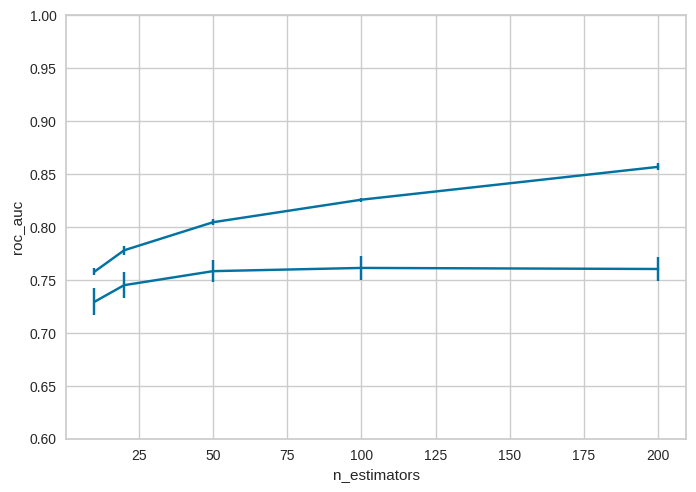

In [ ]:
# plot results
results.index = gbc_param_grid['n_estimators']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('n_estimators')

#### Nro mínimo de observaciones para partir el nodo

In [ ]:
# set up the model
gbc = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    #n_estimators=[10, 20, 50, 100, 200],
    min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    #max_depth=[1,2,3,4,5],
    )

# search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(X_train_t2_p, y_train)

# best hyperparameters
search.best_params_

{'min_samples_split': 0.3}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'min_samples_split': 0.01},0.822210,0.002257,0.761832,0.011524
1,{'min_samples_split': 0.05},0.817325,0.003064,0.761085,0.010408
2,{'min_samples_split': 0.1},0.815003,0.002340,0.761253,0.010747
3,{'min_samples_split': 0.2},0.806034,0.002133,0.761612,0.011212
4,{'min_samples_split': 0.3},0.798571,0.002406,0.762697,0.010844
5,{'min_samples_split': 0.5},0.789888,0.002741,0.761781,0.011542


Text(0.5, 0, 'min_samples_split')

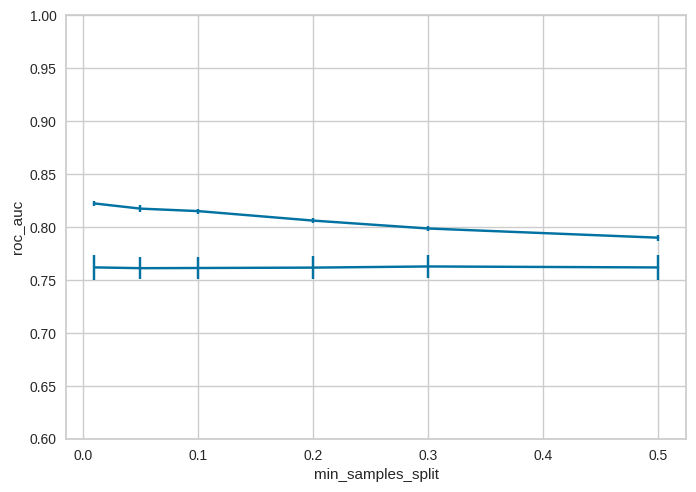

In [ ]:
# plot results
results.index = gbc_param_grid['min_samples_split']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('min_samples_split')

#### Profundidad

In [ ]:
# set up the model
gbc = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    #n_estimators=[10, 20, 50, 100, 200],
    #min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    max_depth=[1,2,3,4,5],
    )

# search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(X_train_t2_p, y_train)

# best hyperparameters
search.best_params_

{'max_depth': 4}

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,{'max_depth': 1},0.763478,0.002782,0.749154,0.011063
1,{'max_depth': 2},0.794129,0.003122,0.759824,0.010545
2,{'max_depth': 3},0.825773,0.001816,0.761320,0.010962
3,{'max_depth': 4},0.870252,0.002588,0.762084,0.010145
4,{'max_depth': 5},0.917408,0.002880,0.757533,0.008352


Text(0.5, 0, 'max_depth')

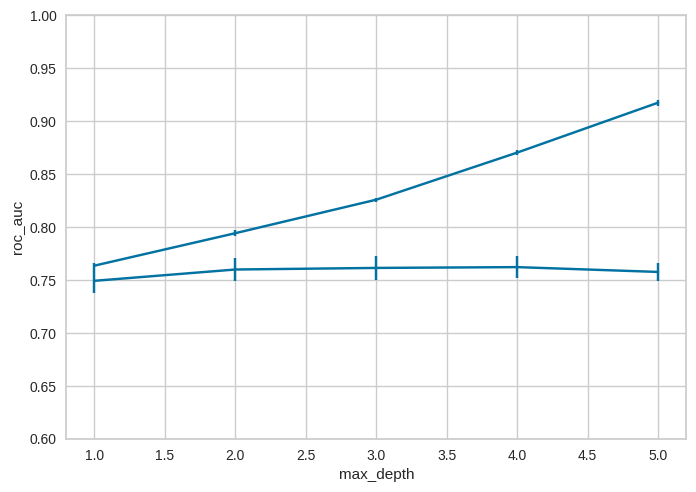

In [ ]:
# plot results
results.index = gbc_param_grid['max_depth']
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylim(0.6, 1)
plt.ylabel('roc_auc')
plt.xlabel('max_depth')

## Veamos al GridSearch con todos los parámetros para evaluar la mejor combinación

In [ ]:
# set up the model
gbc = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    n_estimators=[10, 20, 50, 100, 200],
    min_samples_split=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
    max_depth=[1,2,3,4,5],
    )

# search
reg = GridSearchCV(gbc, gbc_param_grid, scoring='roc_auc', return_train_score=True, cv=5, n_jobs=4)
search = reg.fit(X_train_t2_p, y_train)

# best hyperparameters
search.best_params_

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

## Veamos el RandomSearch para encontrar la mejor combinación en el Gradient Boosting

In [ ]:
# set up the model
gbc = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    n_estimators=stats.randint(10, 200),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )

# search
reg_gbc = RandomizedSearchCV(gbc, gbc_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 60, random_state=10, n_jobs=4)
search_gbc = reg_gbc.fit(X_train_t2_p, y_train)

# best hyperparameters
search_gbc.best_params_

{'max_depth': 4, 'min_samples_split': 0.32714402838624523, 'n_estimators': 168}

In [ ]:
results = pd.DataFrame(search_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'max_depth': 4, 'min_samples_split': 0.327144...",0.820355,0.002912,0.764178,0.011246
1,"{'max_depth': 3, 'min_samples_split': 0.440773...",0.801627,0.002721,0.763694,0.012452
2,"{'max_depth': 4, 'min_samples_split': 0.335499...",0.812205,0.003337,0.763508,0.011644
3,"{'max_depth': 4, 'min_samples_split': 0.467403...",0.806709,0.003153,0.763056,0.011711
4,"{'max_depth': 3, 'min_samples_split': 0.441833...",0.800449,0.002397,0.762967,0.012542
5,"{'max_depth': 3, 'min_samples_split': 0.000272...",0.827597,0.001629,0.762006,0.010743
6,"{'max_depth': 2, 'min_samples_split': 0.605577...",0.786112,0.003568,0.761887,0.011144
7,"{'max_depth': 4, 'min_samples_split': 0.377440...",0.794367,0.003485,0.761783,0.011182
8,"{'max_depth': 3, 'min_samples_split': 0.356250...",0.793057,0.002718,0.761775,0.010410
9,"{'max_depth': 3, 'min_samples_split': 0.140575...",0.813907,0.002478,0.761540,0.010491


Text(0.5, 0, 'Hyperparameter space')

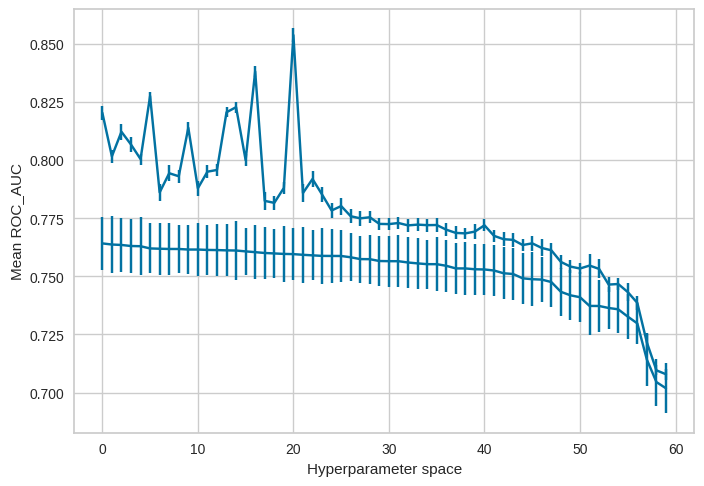

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

### Vamos añadir la técnica de Bayesian Search para Optimización de Hiperparámetros

In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV

In [ ]:
gbm = GradientBoostingClassifier(random_state=0)
param_grid = {
    'n_estimators': (10, 120),
    'min_samples_split': (0.001, 0.99, 'log-uniform'),
    'max_depth': (1, 10),
}

In [ ]:
search_bs_gbc = BayesSearchCV(
    estimator=gbm,
    search_spaces=param_grid,
    scoring='roc_auc',
    cv=5,
    n_iter=50,
    random_state=10,
    n_jobs=4,
    return_train_score=True)

search_bs_gbc.fit(X_train_t2_p, y_train)
search_bs_gbc.best_params_

OrderedDict([('max_depth', 6),
             ('min_samples_split', 0.2724447925929666),
             ('n_estimators', 99)])

In [ ]:
results = pd.DataFrame(search_bs_gbc.cv_results_)[['params', 'mean_train_score', 'std_train_score','mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'max_depth': 6, 'min_samples_split': 0.272444...",0.824458,0.002874,0.764368,0.011574
1,"{'max_depth': 10, 'min_samples_split': 0.38745...",0.826539,0.004328,0.764047,0.010892
2,"{'max_depth': 8, 'min_samples_split': 0.341266...",0.831692,0.002738,0.763599,0.011099
3,"{'max_depth': 10, 'min_samples_split': 0.25966...",0.844614,0.003041,0.763582,0.010444
4,"{'max_depth': 4, 'min_samples_split': 0.001, '...",0.859467,0.002869,0.763577,0.011062
5,"{'max_depth': 9, 'min_samples_split': 0.389895...",0.815489,0.003183,0.763379,0.012914
6,"{'max_depth': 6, 'min_samples_split': 0.221029...",0.826261,0.003307,0.763365,0.010371
7,"{'max_depth': 8, 'min_samples_split': 0.284928...",0.832497,0.003527,0.763010,0.010931
8,"{'max_depth': 3, 'min_samples_split': 0.218642...",0.808025,0.003084,0.763006,0.012017
9,"{'max_depth': 4, 'min_samples_split': 0.093486...",0.838263,0.003368,0.762758,0.009436


Text(0.5, 0, 'Hyperparameter space')

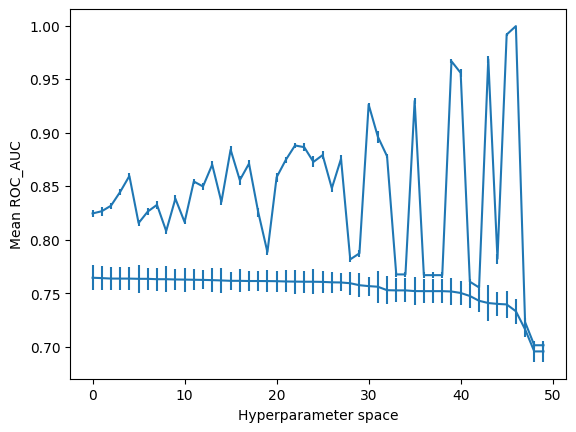

In [ ]:
results['mean_train_score'].plot(yerr=[results['std_train_score'], results['std_train_score']], subplots=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean ROC_AUC')
plt.xlabel('Hyperparameter space')

### Utilicemos Optuna

In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.2 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

In [ ]:
def objective(trial):

    gbc_n_estimators = trial.suggest_int("gbc_n_estimators", 100, 1000)
    gbc_max_depth = trial.suggest_int("gbc_max_depth", 1, 4)
    gbc_min_samples_split = trial.suggest_float("gbc_min_samples_split", 0.01, 1)

    model = GradientBoostingClassifier(
        n_estimators=gbc_n_estimators,
        max_depth=gbc_max_depth,
        min_samples_split=gbc_min_samples_split
    )

    score = cross_val_score(model, X_train_t2_p, y_train, cv=5, scoring='roc_auc')
    roc_auc = score.mean()
    return roc_auc

### Como se ejecutaria un Random Search

In [ ]:
study = optuna.create_study(
    direction="maximize",
    sampler=optuna.samplers.RandomSampler(),
)

study.optimize(objective, n_trials=50)

[I 2024-07-04 23:39:04,025] A new study created in memory with name: no-name-65575228-7aa6-4d4a-ba99-7d200f46759e
[I 2024-07-04 23:40:21,346] Trial 0 finished with value: 0.7605399826992223 and parameters: {'gbc_n_estimators': 773, 'gbc_max_depth': 1, 'gbc_min_samples_split': 0.833399576724366}. Best is trial 0 with value: 0.7605399826992223.
[I 2024-07-04 23:41:18,266] Trial 1 finished with value: 0.761772784905015 and parameters: {'gbc_n_estimators': 225, 'gbc_max_depth': 3, 'gbc_min_samples_split': 0.18615262271902677}. Best is trial 1 with value: 0.761772784905015.
[I 2024-07-04 23:44:44,753] Trial 2 finished with value: 0.7411262645090984 and parameters: {'gbc_n_estimators': 741, 'gbc_max_depth': 4, 'gbc_min_samples_split': 0.04159525932239619}. Best is trial 1 with value: 0.761772784905015.
[I 2024-07-04 23:44:56,973] Trial 3 finished with value: 0.7547714257754586 and parameters: {'gbc_n_estimators': 146, 'gbc_max_depth': 3, 'gbc_min_samples_split': 0.9986659137054185}. Best is 

KeyboardInterrupt: 

In [ ]:
study.best_params

{'gbc_n_estimators': 225,
 'gbc_max_depth': 3,
 'gbc_min_samples_split': 0.18615262271902677}

In [ ]:
study.best_value

0.761772784905015

In [ ]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_gbc_max_depth,params_gbc_min_samples_split,params_gbc_n_estimators,state
0,0,0.760540,2024-07-04 23:39:04.028671,2024-07-04 23:40:21.345755,0 days 00:01:17.317084,1,0.833400,773,COMPLETE
1,1,0.761773,2024-07-04 23:40:21.352591,2024-07-04 23:41:18.266590,0 days 00:00:56.913999,3,0.186153,225,COMPLETE
2,2,0.741126,2024-07-04 23:41:18.268721,2024-07-04 23:44:44.753552,0 days 00:03:26.484831,4,0.041595,741,COMPLETE
3,3,0.754771,2024-07-04 23:44:44.755563,2024-07-04 23:44:56.973070,0 days 00:00:12.217507,3,0.998666,146,COMPLETE
4,4,0.760657,2024-07-04 23:44:56.974939,2024-07-04 23:45:45.990393,0 days 00:00:49.015454,4,0.779741,301,COMPLETE
5,5,0.761017,2024-07-04 23:45:45.992152,2024-07-04 23:46:01.854714,0 days 00:00:15.862562,4,0.629184,100,COMPLETE
6,6,0.760362,2024-07-04 23:46:01.856593,2024-07-04 23:48:00.377340,0 days 00:01:58.520747,2,0.324971,814,COMPLETE
7,7,0.758221,2024-07-04 23:48:00.380866,2024-07-04 23:49:51.371533,0 days 00:01:50.990667,2,0.226654,740,COMPLETE
8,8,0.760465,2024-07-04 23:49:51.373435,2024-07-04 23:51:10.796670,0 days 00:01:19.423235,1,0.711565,981,COMPLETE
9,9,NaN,2024-07-04 23:51:10.798546,2024-07-04 23:52:38.659144,0 days 00:01:27.860598,3,0.263315,442,FAIL


### CONCLUSION GBC: Evaluemos como le va al modelo con los parámetros elegidos en train y test

In [ ]:
# Lo dejamos entrenado con los parámetros hallados
gbc = GradientBoostingClassifier(max_depth= 4, min_samples_split=0.32714402838624523, n_estimators=168, random_state=39)
gbc.fit(X_train_t2_p, y_train)
pred_train_gbc = gbc.predict_proba(X_train_t2_p)
pred_test_gbc = gbc.predict_proba(X_test_t2_p)
print('Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc[:,1]))
print('Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]))

Train roc_auc:  0.812900533089933
Test roc_auc:  0.7479467480412602


### Entonces, basado en sus rendimientos en test, cuál es el mejor modelo?

In [ ]:
print('Logit Test roc_auc: ', roc_auc_score(y_test, pred_test_logit[:,1]), 'Logit Test GINI: ', 2*roc_auc_score(y_test, pred_test_logit[:,1])-1)
print('RF Test roc_auc: ', roc_auc_score(y_test, pred_test_rf[:,1]), 'RF Test GINI: ', 2*roc_auc_score(y_test, pred_test_rf[:,1])-1)
print('GBC Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GBC Test GINI: ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)

Logit Test roc_auc:  0.7386640102961273 Logit Test GINI:  0.47732802059225454
RF Test roc_auc:  0.7289545918096749 RF Test GINI:  0.45790918361934985
GBC Test roc_auc:  0.7479467480412602 GBC Test GINI:  0.4958934960825203


#### FINALMENTE: Si bien no hay una gran diferencia entre los 3 modelos, en cuanto a performance, el GINI más alto es el correspondiente al Modelo de **Gradient Boosting**

### Añadimos un grafico de ROC AUC sobre el modelo ganador

In [ ]:
from yellowbrick.classifier import ROCAUC

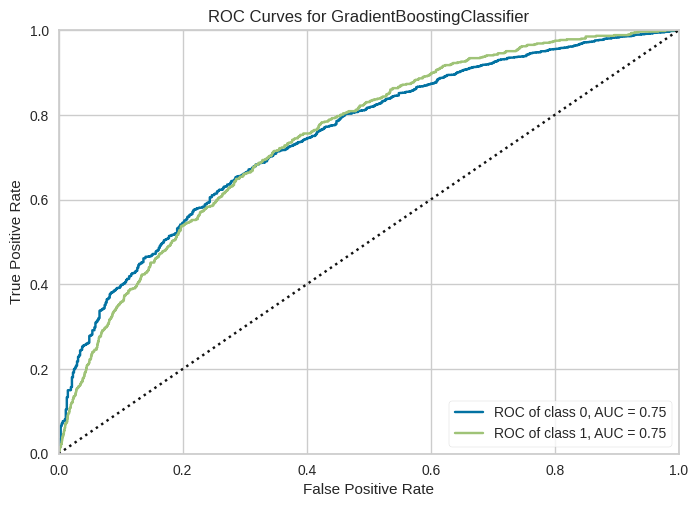

<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer2 = ROCAUC(gbc, is_fitted=True, micro=False, macro=False,)
visualizer2.fit(X_test_t2_p, y_test)
visualizer2.score(X_test_t2_p, y_test)
visualizer2.show()

### **6. Valoración del Modelo**
Empecemos a revisar con el modelo final algunas métricas de valoración del modelo

### **Accuracy**
Porcentaje de predicciones correctas

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
br_test=y_test.value_counts() / len(y_test)
br_test

FLG_DEFAULT_12M
0    0.936665
1    0.063335
Name: count, dtype: float64

In [ ]:
y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

In [ ]:
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy GBC test:', accuracy_score(y_test, gbc.predict(X_test_t2_p)))

Accuracy Baseline test:  0.9366652754590985
Accuracy GBC test: 0.9366652754590985


In [ ]:
from sklearn.metrics import (
    #accuracy_score,
    balanced_accuracy_score,
    recall_score,
)

In [ ]:
print('Balanced accuracy, Baseline test: ', balanced_accuracy_score(y_test, y_test_base))
print('Balanced accuracy, GBC test:',  balanced_accuracy_score(y_test,gbc.predict(X_test_t2_p)))

Balanced accuracy, Baseline test:  0.5
Balanced accuracy, GBC test: 0.5023040760031264


### Como está prediciendo el modelo?

In [ ]:
preds_1 = pd.DataFrame(gbc.predict(X_test_t2_p), columns = ['loan_status'])
preds_1.value_counts()

loan_status
0              9578
1                 6
Name: count, dtype: int64

In [ ]:
6/(6+9578)

0.0006260434056761269

In [ ]:
preds_2 = pd.DataFrame(gbc.predict_proba(X_test_t2_p)[:,1], columns = ['prob_default'])
preds_2['loan_status'] = preds_2['prob_default'].apply(lambda x: 1 if x > 0.15 else 0)
preds_2['loan_status'].value_counts()

loan_status
0    8657
1     927
Name: count, dtype: int64

In [ ]:
927/(927+8657)

0.0967237061769616

## Identificamos un punto de corte óptimo que maximice el F1 Score

In [ ]:
from yellowbrick.classifier.threshold import DiscriminationThreshold
import warnings
warnings.filterwarnings('ignore')

In [ ]:
gbc = GradientBoostingClassifier(max_depth= 4, min_samples_split=0.32714402838624523, n_estimators=168, random_state=0)
gbc.fit(X_train_t2_p, y_train)

GradientBoostingClassifier(max_depth=4, min_samples_split=0.32714402838624523,
                           n_estimators=168, random_state=0)

In [ ]:
#visualizer = DiscriminationThreshold(gbc, is_fitted=True, random_state=0, argmax='fscore')
#visualizer.fit(X_test_t2_p, y_test)
#visualizer.score(X_test_t2_p, y_test)
#visualizer.show()

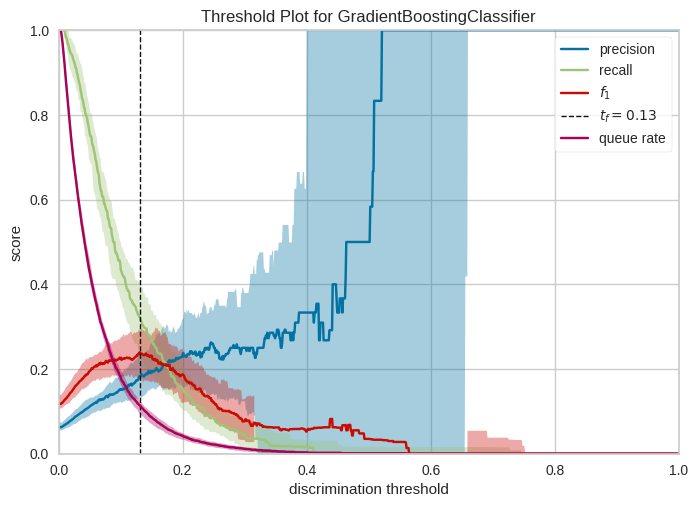

YellowbrickAttributeError: neither visualizer 'DiscriminationThreshold' nor wrapped estimator 'GradientBoostingClassifier' have attribute 'force_model'

YellowbrickAttributeError: neither visualizer 'DiscriminationThreshold' nor wrapped estimator 'GradientBoostingClassifier' have attribute 'force_model'

YellowbrickAttributeError: neither visualizer 'DiscriminationThreshold' nor wrapped estimator 'GradientBoostingClassifier' have attribute 'force_model'

In [ ]:
from yellowbrick.classifier.threshold import discrimination_threshold
discrimination_threshold(gbc, X_test_t2_p, y_test)

In [ ]:
preds_2 = pd.DataFrame(gbc.predict_proba(X_test_t2_p)[:,1], columns = ['prob_default'])
preds_2['loan_status'] = preds_2['prob_default'].apply(lambda x: 1 if x > 0.13 else 0)
preds_2['loan_status'].value_counts()

loan_status
0    8353
1    1231
Name: count, dtype: int64

## Precision, Recall, F-measure, Support

- **Precision** = tp / (tp + fp)

- **Recall** = tp / (tp + fn)

- **F1** = 2 * (precision * recall) / (precision + recall)

- **Support** = Number of cases on each class

In [ ]:
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy GBC test:', accuracy_score(y_test, gbc.predict(X_test_t2_p)))
print('Accuracy GBC test Corte Optimo:', accuracy_score(y_test, preds_2['loan_status']))

Accuracy Baseline test:  0.9366652754590985
Accuracy GBC test: 0.9366652754590985
Accuracy GBC test Corte Optimo: 0.8562186978297162


In [ ]:
print('Balanced accuracy Baseline test: ', balanced_accuracy_score(y_test, y_test_base))
print('Balanced accuracy GBC test:',  balanced_accuracy_score(y_test,gbc.predict(X_test_t2_p)))
print('Balanced accuracy GBC test Corte Optimo:',  balanced_accuracy_score(y_test,preds_2['loan_status']))

Balanced accuracy Baseline test:  0.5
Balanced accuracy GBC test: 0.5023040760031264
Balanced accuracy GBC test Corte Optimo: 0.6337027501546603


In [ ]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    precision_recall_fscore_support,
)

In [ ]:
# Precision
print('Precision Baseline test: ', precision_score(y_test, y_test_base))
print('Precision GBC test:', precision_score(y_test,gbc.predict(X_test_t2_p)))
print('Precision GBC test Corte Optimo:', precision_score(y_test,preds_2['loan_status']))

Precision Baseline test:  0.0
Precision GBC test: 0.5
Precision GBC test Corte Optimo: 0.1868399675060926


In [ ]:
# Recall
print('Recall Baseline test: ', recall_score(y_test, y_test_base))
print('Recall GBC test:', recall_score(y_test,gbc.predict(X_test_t2_p)))
print('Recall GBC test Corte Optimo:', recall_score(y_test,preds_2['loan_status']))

Recall Baseline test:  0.0
Recall GBC test: 0.004942339373970346
Recall GBC test Corte Optimo: 0.37891268533772654


In [ ]:
# F1-Score
print('F-measure Baseline test: ', f1_score(y_test, y_test_base))
print('F-measure GBC test:', f1_score(y_test, gbc.predict(X_test_t2_p)))
print('F-measure GBC test Corte Optimo:', f1_score(y_test, preds_2['loan_status']))

F-measure Baseline test:  0.0
F-measure GBC test: 0.009787928221859706
F-measure GBC test Corte Optimo: 0.250272034820457


In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(
    y_test, preds_2['loan_status'])

print('Precision: ', precision)
print('Recall: ', recall)
print('F1-score: ', fscore)

## Matriz de Confusión

TN | FP

FN | TP

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_test_base, labels=[0,1])

array([[8977,    0],
       [ 607,    0]])

In [ ]:
confusion_matrix(y_test, gbc.predict(X_test_t2_p), labels=[0,1])

array([[8974,    3],
       [ 604,    3]])

In [ ]:
confusion_matrix(y_test, preds_2['loan_status'], labels=[0,1])

array([[7976, 1001],
       [ 377,  230]])

## **7. Técnicas de balanceo**
En este punto, propongamos algunos métodos de balanceo y revisemos su impacto en el performance del modelo candidato

In [ ]:
df_clase.columns

Index(['CODMES', 'CODSOLICITUD', 'DEUDA', 'PLAZO_CREDITO', 'FLG_GARANTIA',
       'MIN_MES_DE_DEFAULT', 'FLG_DEFAULT_12M', 'SEGMENTOCLIENTE',
       'TARJETA_RELACIONADA', 'VEHICULAR_RELACIONADA',
       'HIPOTECARIO_RELACIONADA', 'ATRASO_MAXIMO_ULT_6M',
       'ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
       'MESES_AHORROS_ULT_6M', 'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA',
       'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'NUMERO_DE_PAGOS_PDH',
       'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'PROFESION',
       'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'EDAD_T', 'CUOTA', 'LINEA_DE_TC',
       'MONTO_TC_MEMBRESIA', 'FLG_TC_VISA', 'FLG_TC_MC'],
      dtype='object')

In [ ]:
X_y_train = pd.concat([X_train_t2_p.reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['FLG_DEFAULT_12M'].value_counts()
print(count_nondefault,count_default)

20943 1417


In [ ]:
X_y_train.shape

(22360, 15)

In [ ]:
# Separamos la muestra en 2 partes: defaults y no defaults
nondefaults = X_y_train[X_y_train['FLG_DEFAULT_12M'] == 0]
defaults = X_y_train[X_y_train['FLG_DEFAULT_12M'] == 1]
print(nondefaults.shape)
print(defaults.shape)

(20943, 15)
(1417, 15)


In [ ]:
# Reducimos la muestra de nondefaults
nondefaults_under = nondefaults.sample(count_default)
print(nondefaults_under.shape)

(1417, 15)


In [ ]:
# Unimos la muestra de defaults y la de nondefaults reducida
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Verificamos los nros de defaults y no defaults
print(X_y_train_under['FLG_DEFAULT_12M'].value_counts())

FLG_DEFAULT_12M
0    1417
1    1417
Name: count, dtype: int64


In [ ]:
X_y_train_under.shape

(2834, 15)

In [ ]:
X_train_rus=X_y_train_under.drop(columns='FLG_DEFAULT_12M')
X_train_rus.head()

,SEGMENTOCLIENTE,CLASIF_SISTEMA_ULT_12M,FLG_PDH,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,FLG_GARANTIA,MEDIANA_AHORROS_ULT_6M,MESES_AHORROS_ULT_6M,LINEA_DE_TC,EDAD_T,DEUDA,DEUDA_TOTAL_SISTEMA,ATRASO_MAXIMO_ULT_12M
0,0.151884,0.250915,-0.17122,0.348445,0.015491,0.134467,0.033388,-0.330236,0.0,-0.736564,-0.384615,-0.474660,-0.285436,0.0
1,0.151884,-0.229072,-0.17122,-0.497639,-0.111075,0.134467,0.033388,-0.463889,0.0,-0.575045,0.153846,0.517547,1.085898,0.0
2,-0.872743,0.344459,-0.17122,0.247396,-0.136696,-0.424542,0.033388,-0.339904,0.0,-0.516439,0.153846,-0.191778,-0.106721,0.0
3,0.151884,1.168621,-0.17122,0.247396,-0.136696,-0.424542,0.033388,0.296594,-1.0,-0.345934,0.384615,-0.257895,-0.264468,0.0
4,0.151884,-0.229072,-0.17122,-0.273802,-0.081927,-0.424542,0.033388,-0.538286,-2.0,0.358749,0.769231,-0.171735,0.275418,0.0


In [ ]:
y_train_rus=X_y_train_under['FLG_DEFAULT_12M']
y_train_rus.value_counts()

FLG_DEFAULT_12M
0    1417
1    1417
Name: count, dtype: int64

In [ ]:
# set up the model
gbc2 = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
gbc_param_grid = dict(
    n_estimators=stats.randint(10, 200),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    )

# search
reg_gbc2 = RandomizedSearchCV(gbc2, gbc_param_grid, scoring='roc_auc', cv=5, return_train_score=True, n_iter = 60, random_state=10, n_jobs=4)
search_gbc2 = reg_gbc2.fit(X_train_rus, y_train_rus)

# best hyperparameters
search_gbc2.best_params_

{'max_depth': 4, 'min_samples_split': 0.37744066473195137, 'n_estimators': 72}

In [ ]:
# Modelo GBC con balanceo y sin balanceo
pred_train_gbc = gbc.predict_proba(X_train_t2_p)
pred_train_gbc2 = search_gbc2.predict_proba(X_train_rus)
print('Sin Balanceo Train roc_auc: ', roc_auc_score(y_train, pred_train_gbc[:,1]), 'GINI Train ', 2*roc_auc_score(y_train, pred_train_gbc[:,1])-1)
print('Con Balanceo Train roc_auc: ', roc_auc_score(y_train_rus, pred_train_gbc2[:,1]), 'GINI Train ', 2*roc_auc_score(y_train_rus, pred_train_gbc2[:,1])-1)

Sin Balanceo Train roc_auc:  0.812900533089933 GINI Train  0.6258010661798661
Con Balanceo Train roc_auc:  0.8013326433881554 GINI Train  0.6026652867763107


In [ ]:
# Modelo GBC con balanceo y sin balanceo
pred_test_gbc = gbc.predict_proba(X_test_t2_p)
pred_test_gbc2 = search_gbc2.predict_proba(X_test_t2_p)
print('Sin Balanceo Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc[:,1]), 'GINI Test ', 2*roc_auc_score(y_test, pred_test_gbc[:,1])-1)
print('Con Balanceo Test roc_auc: ', roc_auc_score(y_test, pred_test_gbc2[:,1]), 'GINI Test ', 2*roc_auc_score(y_test, pred_test_gbc2[:,1])-1)

Sin Balanceo Test roc_auc:  0.7479467480412602 GINI Test  0.4958934960825203
Con Balanceo Test roc_auc:  0.7437179289779353 GINI Test  0.48743585795587063


## **8. Calibración del Modelo**
En esta parte verificaremos, y de ser necesario, calibraremos el modelo revisando la relación entre los valores los ratios de default reales y las PDs promedios que arroja el modelo.

In [ ]:
from sklearn.calibration import calibration_curve

In [ ]:
# Veamos los RDs y los promedios de PDs en cada bucket para el modelo original (sin balanceo)
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test, pred_test_gbc[:, 1], n_bins=10, strategy='uniform')

len(mean_predicted_value), len(fraction_of_positives)

(7, 7)

In [ ]:
mean_predicted_value

array([0.03783799, 0.13779876, 0.23876068, 0.33731379, 0.43632342,
       0.54026578, 0.63519181])

In [ ]:
fraction_of_positives

array([0.04024486, 0.13167013, 0.21883657, 0.26923077, 0.27777778,
       0.66666667, 0.33333333])

In [ ]:
# Una función para consolidar lo anterior
def plot_calibration_curve(y_true, probs, bins, strategy):

    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_true, probs, n_bins=bins, strategy=strategy)

    max_val = max(mean_predicted_value)

    plt.figure(figsize=(8,10))
    plt.subplot(2, 1, 1)
    plt.plot(mean_predicted_value, fraction_of_positives, label='Logistic Regression')
    plt.plot(np.linspace(0, max_val, bins), np.linspace(0, max_val, bins),
         linestyle='--', color='red', label='Perfect calibration')

    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of positive examples')
    plt.title('Calibration Curve')
    plt.legend(loc='upper left')


    plt.subplot(2, 1, 2)
    plt.hist(probs, range=(0, 1), bins=bins, density=True, stacked=True, alpha=0.3)
    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of examples')
    plt.title('Density')
    plt.show()

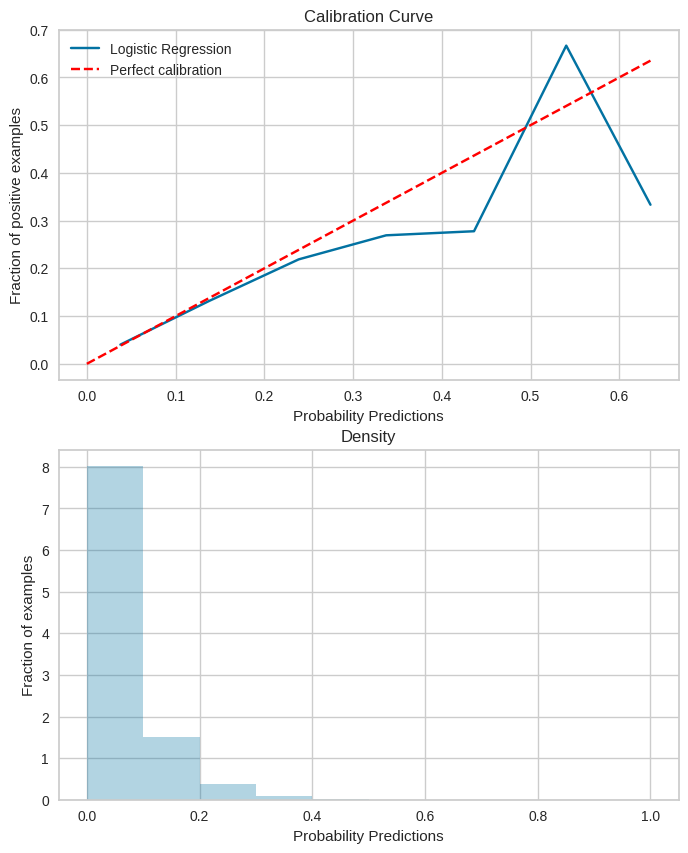

In [ ]:
# Modelo Original, sin balanceo
plot_calibration_curve(y_test, pred_test_gbc[:, 1], bins=10, strategy='uniform')

In [ ]:
from sklearn.metrics import brier_score_loss

In [ ]:
brier_score_loss(y_test, pred_test_gbc[:, 1])

0.056056427650066715

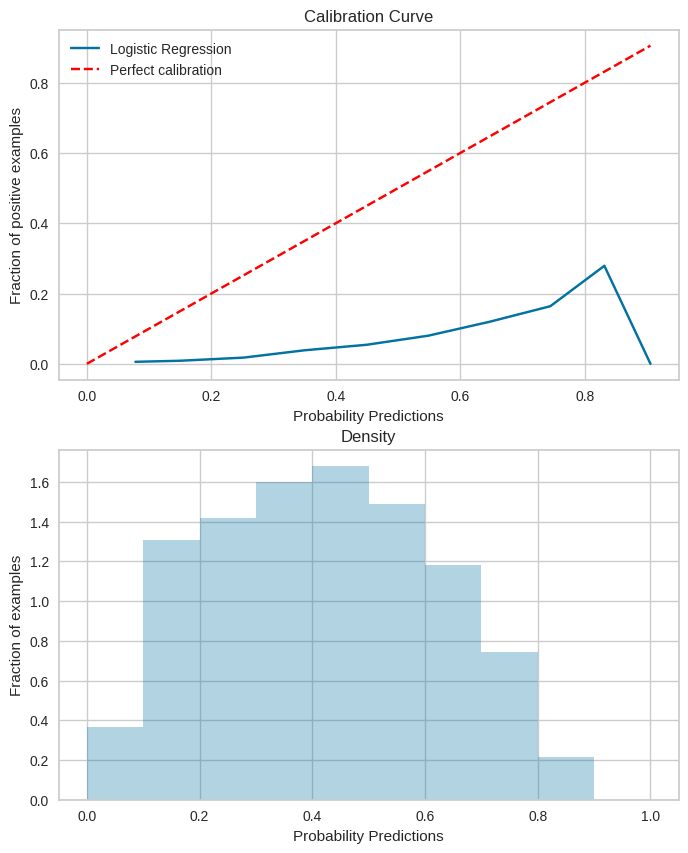

In [ ]:
# Modelo con Undersampling
plot_calibration_curve(y_test, pred_test_gbc2[:, 1], bins=10, strategy='uniform')

In [ ]:
brier_score_loss(y_test, pred_test_gbc2[:, 1])

0.20615304676631427

### Planteemos dos métodos, el ajuste por función sigmoide y el ajuste por función isotónica

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
# Sobre el modelo original
# Calibración Sigmoide
cal_sigmoid = CalibratedClassifierCV(gbc, cv='prefit', method='sigmoid')
cal_sigmoid.fit(X_test_t2_p, y_test)
prob_sigmoid = cal_sigmoid.predict_proba(X_test_t2_p)[:, 1]

# Calibración Isotónica
cal_isotonic = CalibratedClassifierCV(gbc, cv='prefit', method='isotonic')
cal_isotonic.fit(X_test_t2_p, y_test)
prob_isotonic = cal_isotonic.predict_proba(X_test_t2_p)[:, 1]

#### Revisemos la calibración Sigmoide

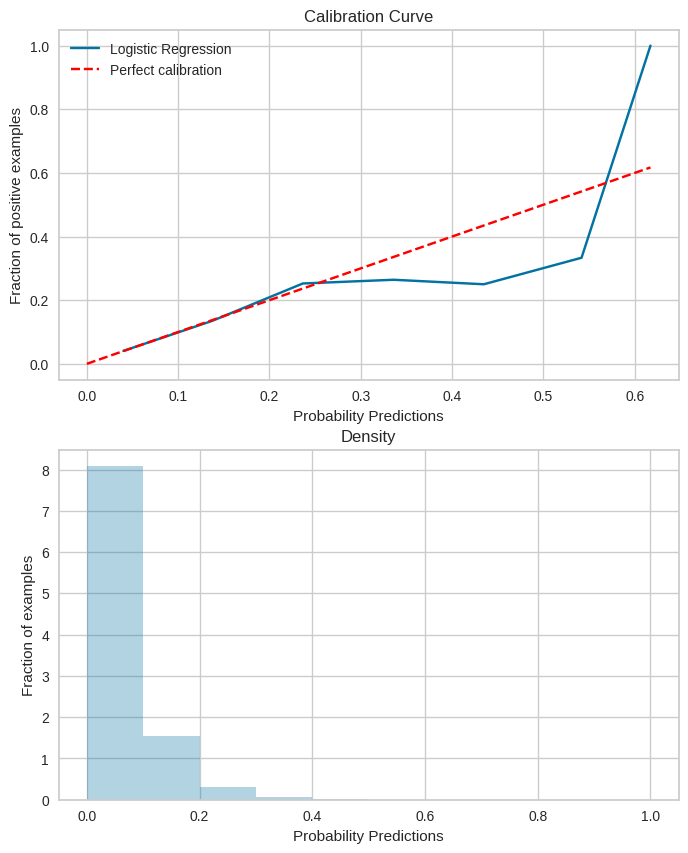

In [ ]:
plot_calibration_curve(y_test, prob_sigmoid, bins=10, strategy='uniform')

### Acaso la calibración varía la discriminación del modelo?

In [ ]:
print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_sigmoid)))

Test set
GBC roc-auc: 0.7479467480412602
Test set con Calibrado
GBC roc-auc: 0.7479467480412602


In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_gbc[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_sigmoid)))

Test set
Brier Score: 0.056056427650066715
Test set con Calibrado
Brier Score: 0.055990377478849565


### Ahora revisemos la calibración isotónica

In [ ]:
plot_calibration_curve(y_test, prob_isotonic, bins=10, strategy='uniform')

In [ ]:
print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_isotonic)))

Test set
GBC roc-auc: 0.7479467480412602
Test set con Calibrado
GBC roc-auc: 0.7527804444049676


In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_gbc[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_isotonic)))

Test set
Brier Score: 0.056056427650066715
Test set con Calibrado
Brier Score: 0.05564949313589998


In [ ]:
# Sobre el modelo balanceado por undersampling
# Calibración Sigmoide
cal_sigmoid2 = CalibratedClassifierCV(search_gbc2, cv='prefit', method='sigmoid')
cal_sigmoid2.fit(X_test_t2_p, y_test)
prob_sigmoid2 = cal_sigmoid2.predict_proba(X_test_t2_p)[:, 1]

# Calibración Isotónica
cal_isotonic2 = CalibratedClassifierCV(search_gbc2, cv='prefit', method='isotonic')
cal_isotonic2.fit(X_test_t2_p, y_test)
prob_isotonic2 = cal_isotonic2.predict_proba(X_test_t2_p)[:, 1]

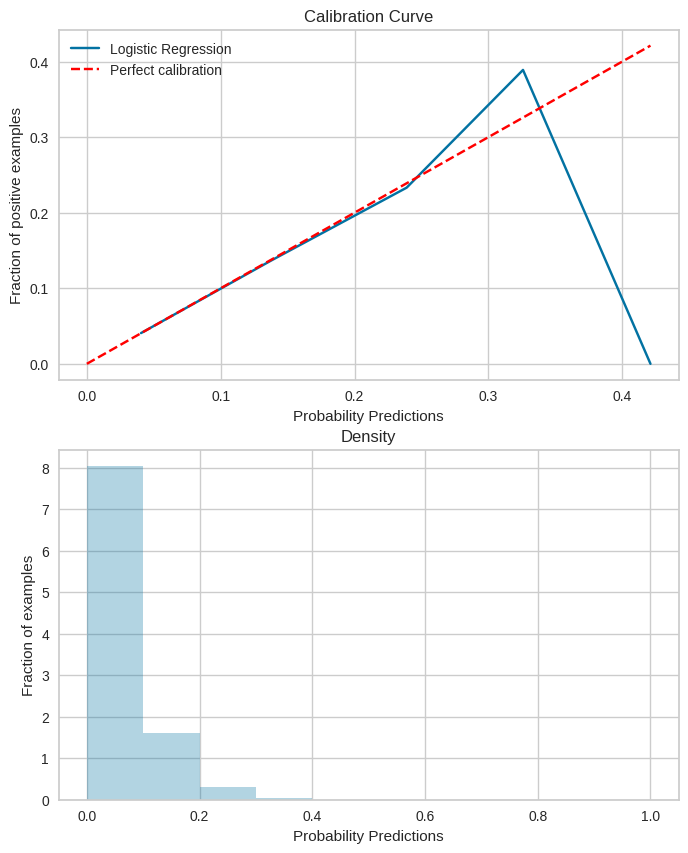

In [ ]:
# Calibración sigmoidea
plot_calibration_curve(y_test, prob_sigmoid2, bins=10, strategy='uniform')

In [ ]:
print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc2[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_sigmoid2)))

Test set
GBC roc-auc: 0.7437179289779353
Test set con Calibrado
GBC roc-auc: 0.7437179289779353


In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_gbc2[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_sigmoid2)))

Test set
Brier Score: 0.20615304676631427
Test set con Calibrado
Brier Score: 0.05614166924900778


In [ ]:
# Calibración isotónica
plot_calibration_curve(y_test, prob_isotonic2, bins=10, strategy='uniform')

In [ ]:
print('Test set')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, pred_test_gbc2[:,1])))
print('Test set con Calibrado')
print('GBC roc-auc: {}'.format(roc_auc_score(y_test, prob_isotonic2)))

Test set
GBC roc-auc: 0.7437179289779353
Test set con Calibrado
GBC roc-auc: 0.747887288015373


In [ ]:
print('Test set')
print('Brier Score: {}'.format(brier_score_loss(y_test, pred_test_gbc2[:, 1])))
print('Test set con Calibrado')
print('Brier Score: {}'.format(brier_score_loss(y_test, prob_isotonic2)))

Test set
Brier Score: 0.20615304676631427
Test set con Calibrado
Brier Score: 0.05583594263203415


## **9. Unboxing de Modelos**

---



#### Primero, entendamos la importancia de cada variable. Hagamos el ejercicio con cada tipo de algoritmo

#### **Logit**

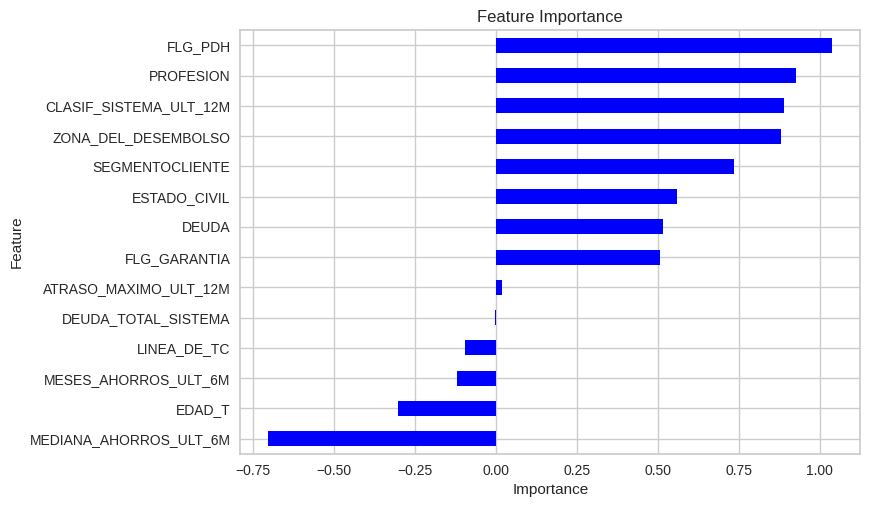

In [ ]:
fi=pd.Series(logit.coef_[0],index=logit.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

#### **Random Forest**

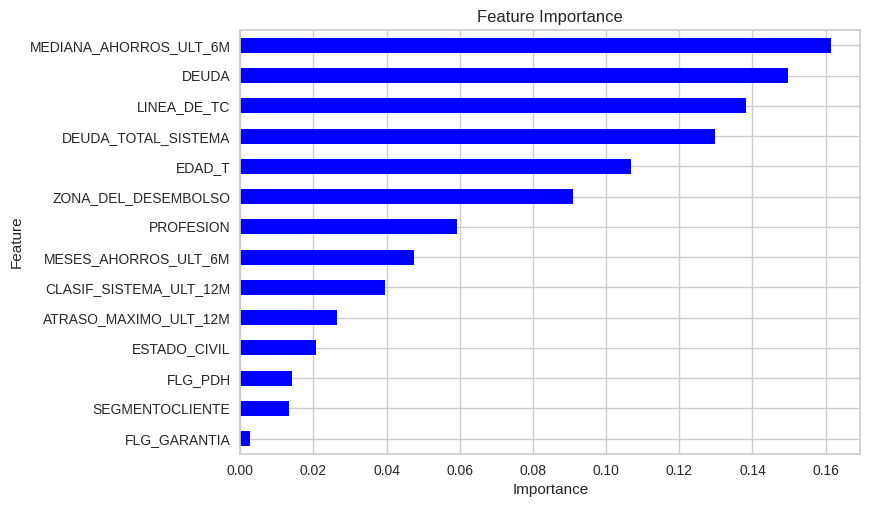

In [ ]:
fi=pd.Series(rf.feature_importances_,index=rf.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

#### **Gradient Boosting**

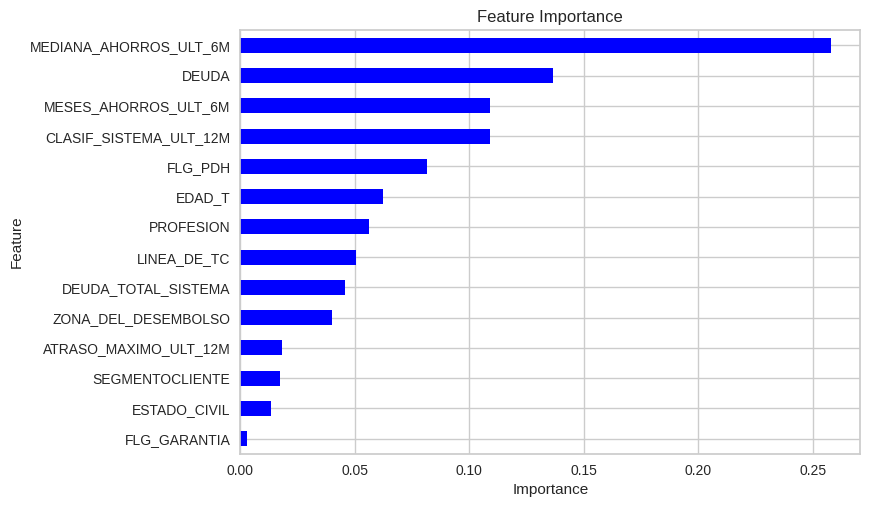

In [ ]:
fi=pd.Series(gbc.feature_importances_,index=gbc.feature_names_in_)
fi.sort_values(ascending=True, inplace=True)
fi.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show ()

### Ahora realicemos un análisis de la importancia de las variables usando **SHAP**

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.2 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(gbc)
shap_values_bin = explainer(X_test_t2_p)
print(shap_values_bin.shape)

(9584, 14)


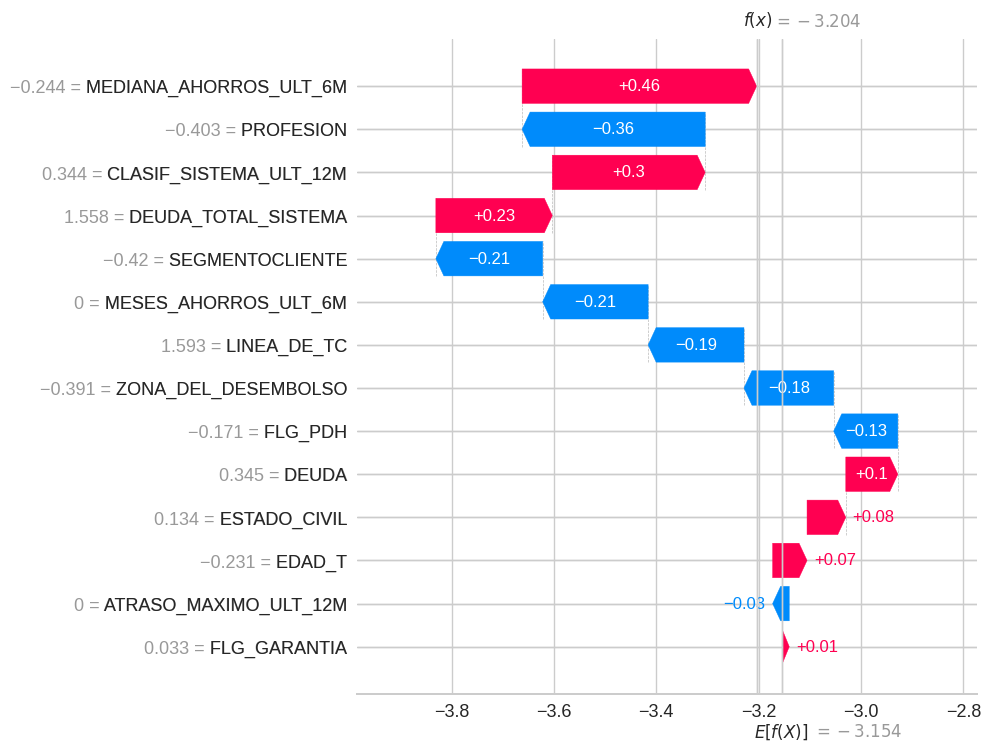

In [ ]:
shap.plots.waterfall(shap_values_bin[0], max_display=30)

### En este punto hagamos la prueba de como se incrementa o reduce el riesgo según el aprote de cada variable

In [ ]:
pred_test_gbc[0,1]

0.03901400913425397

In [ ]:
import math

In [ ]:
# el valor del log odds en la primera observación es
x=-3.204
# Por tanto su probabilidad es:
1/(1+math.exp(-x))

0.039015472882521746

#### Podemos graficar la relación entre los shap values (log odds) y los valores de una variable

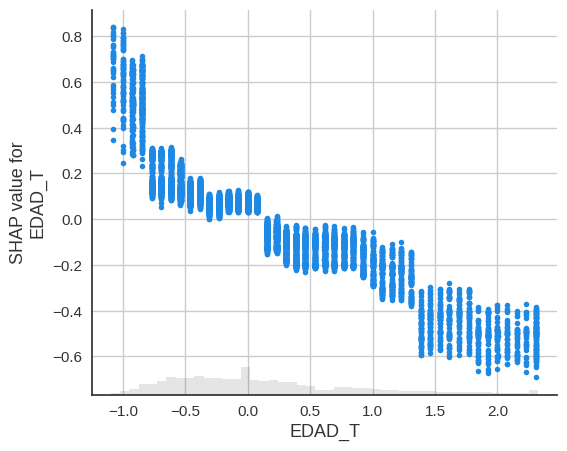

In [ ]:
shap.plots.scatter(shap_values_bin[:, "EDAD_T"])

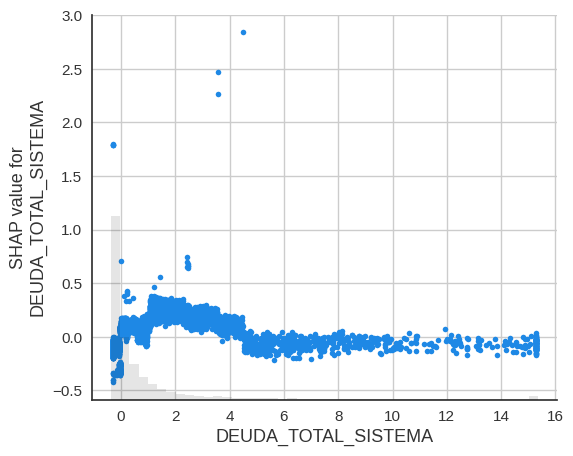

In [ ]:
shap.plots.scatter(shap_values_bin[:, "DEUDA_TOTAL_SISTEMA"])

In [ ]:
# En este punto revisamos el valor en probabilidad y como se explica cada punto
shap.initjs()
shap.plots.force(shap_values_bin[0],link='logit')

### Con el gráfico de barras vamos a evaluar la importancia media de cada variable

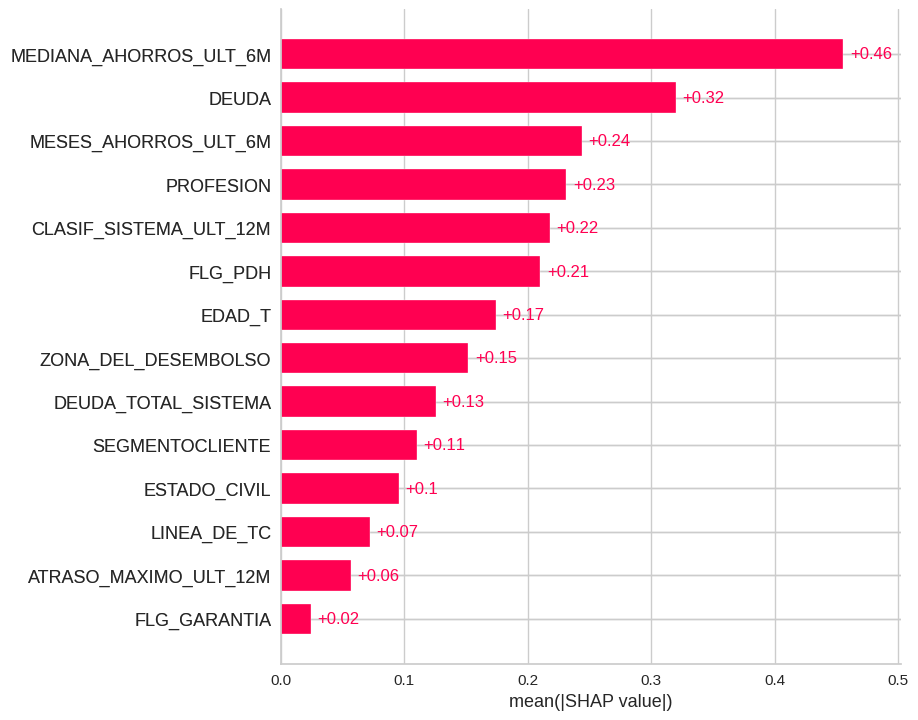

In [ ]:
shap.plots.bar(shap_values_bin,max_display=30)

#### Podemos también construir un gráfico local, es decir, para una observación

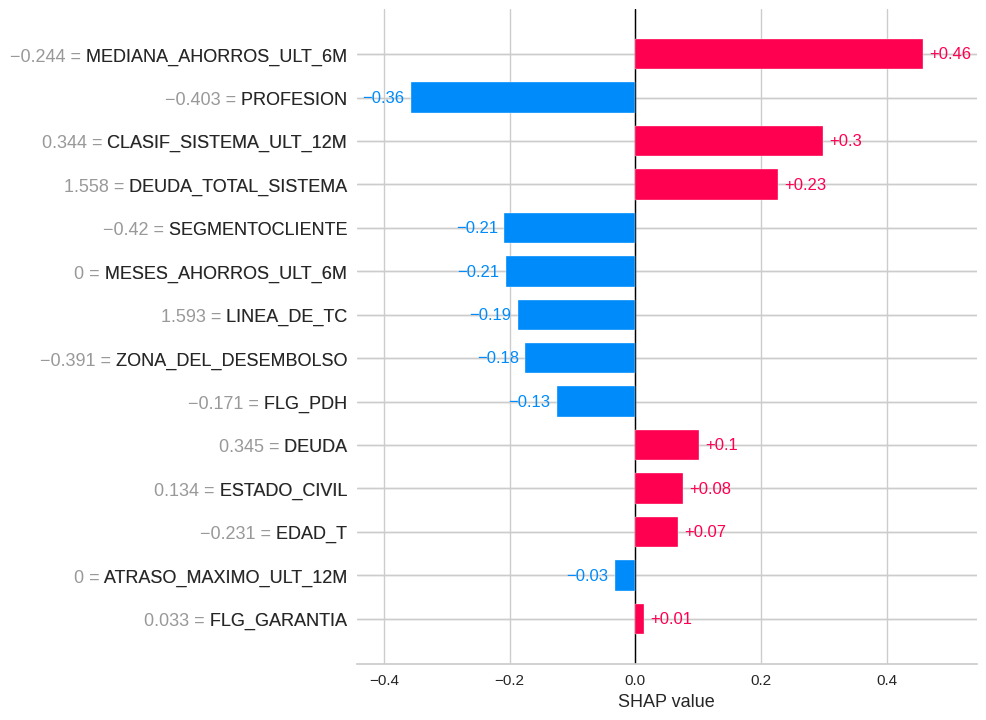

In [ ]:
shap.plots.bar(shap_values_bin[0],max_display=30)

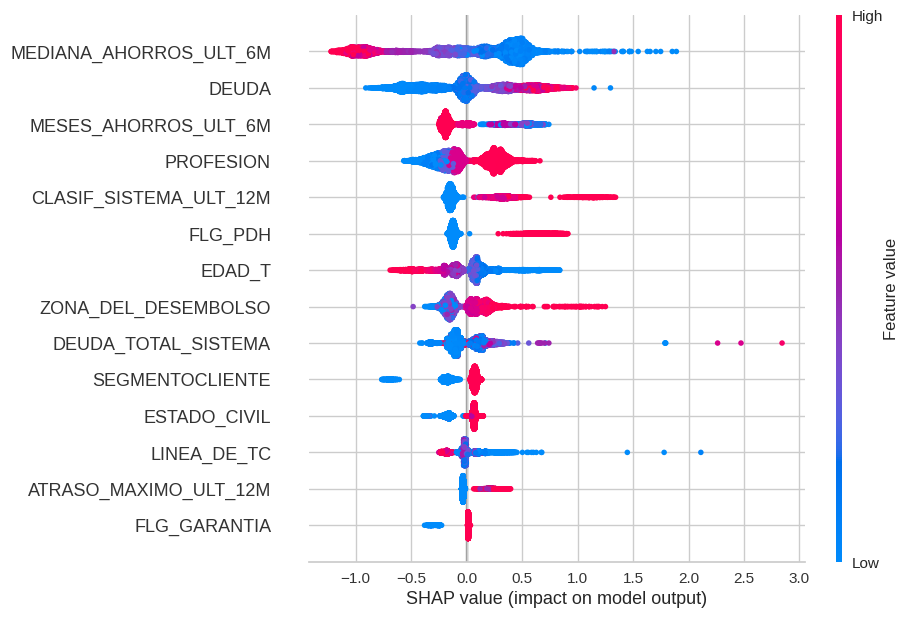

In [ ]:
# Este tipo de gráfico evalua todo el conjunto
shap.plots.beeswarm(shap_values_bin, max_display=30)

## **10. Pickling y Unpickling el Modelo y del Pipeline del Feature Engineering**

In [ ]:
import pickle

In [ ]:
# Empaquetamos el pipeline del feature engineering
with open('fe_pipeline.pickle','wb') as fe_data_file:
     pickle.dump(pipe_5,fe_data_file)

In [ ]:
# Empaquetamos el modelo obtenido
with open('final_model.pickle','wb') as modelFile:
     pickle.dump(gbc,modelFile)

In [ ]:
# Cargar el pipeline del feature engineering
with open('fe_pipeline.pickle','rb') as fe_data_file:
     fe_final = pickle.load(fe_data_file)

In [ ]:
# Cargar el modelo
with open('final_model.pickle','rb') as modelFile:
     modelo_final = pickle.load(modelFile)

In [ ]:
#Probemos el pipeline
X_train_t_p=fe_final.transform(X_train)
X_test_t_p=fe_final.transform(X_test)

In [ ]:
X_train_t2_p=pd.concat([X_train_t_p[cat_cols_3], X_train_t_p[num_cols_3]], axis=1)
X_test_t2_p=pd.concat([X_test_t_p[cat_cols_3], X_test_t_p[num_cols_3]], axis=1)

In [ ]:
# Probemos el modelo
pred_train_prueba = modelo_final.predict_proba(X_train_t2_p)
pred_test_prueba = modelo_final.predict_proba(X_test_t2_p)
print('GBC Train Prueba roc-auc: {}'.format(roc_auc_score(y_train, pred_train_prueba[:,1])))
print('GBC Test Prueba roc-auc: {}'.format(roc_auc_score(y_test, pred_test_prueba[:,1])))

In [ ]:
#pd.concat([X_test,y_test],axis=1).to_csv('Base_SolicitudesCreditoEfectivo_Test.csv', index = False)